# Step 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('data/zillow_data.csv')

In [2]:
data.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [3]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [4]:
data.shape

(14723, 272)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
data.describe()

RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.665094e+04  8.687208e+04  8.715185e+04   
min    1.160000e+04  1.180000e+04  1.180000e+04  1.200000e+04  1.210000e+04   
25%    6.910000e+04  6.920000e+04  6.937500e+04  6.950000e+04  6.960000e+04   
50%    9.970000e+04  9.970000e+04  9.980000e+04  9.990000e+04  9.995000e+04   
75%    1.432250e+05  1.432250e+05  1.435000e+05  1.437000e+05  1.439000e+05   
max    3.729600e+06  3.754600e+06  3.781800e+06  3.813500e+06  3.849600e+06   

       ...       2017-07       2017-08       2017-09       2017-10  \
count  ...  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   ...  2.733354e+05  2.748658e+05  2.764646e+05  2.780332e+05   
std    ...  3.603984e+05  3.614678e+05  3.627563e+05  3.644610e+05   
min    ...  1.440000e+04  1.450000e+04  1.470000e+04  1.480000e+04   
25%    ...  1.269000e+05  1.275000e+05  1.282000e+05  1.287000e+05   
50%    ...  1.884000e+05  1.896000e+05  1.905000e+05  1.914000e+05   
75%    ...  3.050000e+05  3.066500e+05  3.085000e+05  3.098000e+05   
max    ...  1.888990e+07  1.870350e+07  1.860530e+07  1.856940e+07   

            2017-11       2017-12       2018-01       2018-02       2018-03  \
count  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   2.795209e+05  2.810953e+05  2.826571e+05  2.843687e+05  2.865114e+05   
std    3.656003e+05  3.670454e+05  3.695727e+05  3.717739e+05  3.724612e+05   
min    1.450000e+04  1.430000e+04  1.410000e+04  1.390000e+04  1.380000e+04   
25%    1.292500e+05  1.299000e+05  1.306000e+05  1.310500e+05  1.319500e+05   
50%    1.925000e+05  1.934000e+05  1.941000e+05  1.950000e+05  1.967000e+05   
75%    3.117000e+05  3.134000e+05  3.151000e+05  3.168500e+05  3.188500e+05   
max    1.842880e+07  1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07   

            2018-04  
count  1.472300e+04  
mean   2.880399e+05  
std    3.720544e+05  
min    1.380000e+04  
25%    1.324000e+05  
50%    1.981000e+05  
75%    3.211000e+05  
max    1.789490e+07  

[8 rows x 268 columns]

In [7]:
data.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [8]:
data['City'][data.Metro.isna()].value_counts()

Greensboro      12
Carthage         4
Lexington        4
High Point       4
Homer            3
                ..
Mariposa         1
Prentiss         1
Jena             1
Federalsburg     1
Sherburn         1
Name: City, Length: 941, dtype: int64

# Step 2: Get date/time information

In [9]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [10]:
datetimes = get_datetimes(data.iloc[:, 7:])
datetimes

DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

# Step 3: Reshape from Wide to Long Format

In [11]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [12]:
melted = pd.melt(data, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)

In [13]:
melted  # this is data in the long format

RegionID  RegionName                 City State              Metro  \
0           84654       60657              Chicago    IL            Chicago   
1           90668       75070             McKinney    TX  Dallas-Fort Worth   
2           91982       77494                 Katy    TX            Houston   
3           84616       60614              Chicago    IL            Chicago   
4           93144       79936              El Paso    TX            El Paso   
...           ...         ...                  ...   ...                ...   
3901590     58333        1338             Ashfield    MA    Greenfield Town   
3901591     59107        3293            Woodstock    NH          Claremont   
3901592     75672       40404                Berea    KY           Richmond   
3901593     93733       81225  Mount Crested Butte    CO                NaN   
3901594     95851       89155             Mesquite    NV          Las Vegas   

        CountyName  SizeRank       time     value  
0             Cook         1 1996-04-01  334200.0  
1           Collin         2 1996-04-01  235700.0  
2           Harris         3 1996-04-01  210400.0  
3             Cook         4 1996-04-01  498100.0  
4          El Paso         5 1996-04-01   77300.0  
...            ...       ...        ...       ...  
3901590   Franklin     14719 2018-04-01  209300.0  
3901591    Grafton     14720 2018-04-01  225800.0  
3901592    Madison     14721 2018-04-01  133400.0  
3901593   Gunnison     14722 2018-04-01  664400.0  
3901594      Clark     14723 2018-04-01  357200.0  

[3901595 rows x 9 columns]

In [14]:
data_mean = melt_data(data)
data_mean  # this is data for all states combined

value
time                     
1996-04-01  118299.123063
1996-05-01  118419.044139
1996-06-01  118537.423268
1996-07-01  118653.069278
1996-08-01  118780.254312
...                   ...
2017-12-01  281095.320247
2018-01-01  282657.060382
2018-02-01  284368.688447
2018-03-01  286511.376757
2018-04-01  288039.944305

[265 rows x 1 columns]

In [15]:
melted.isna().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         276395
CountyName         0
SizeRank           0
time               0
value         156891
dtype: int64

In [16]:
melted[melted.Metro.isna()].City.value_counts()

Greensboro    3180
Lexington     1060
High Point    1060
Carthage      1060
Milan          795
              ... 
Peabody        265
Booneville     265
Hinton         265
Topton         265
Silverwood     265
Name: City, Length: 941, dtype: int64

In [17]:
melted[melted.value.isna()].time.value_counts()

1996-04-01    1039
1997-04-01    1039
1997-01-01    1039
1997-05-01    1039
1996-06-01    1039
              ... 
2014-05-01      56
2014-01-01      56
2014-03-01      56
2014-06-01      56
2014-04-01      56
Name: time, Length: 219, dtype: int64

# Step 4: EDA and Visualization

In [18]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


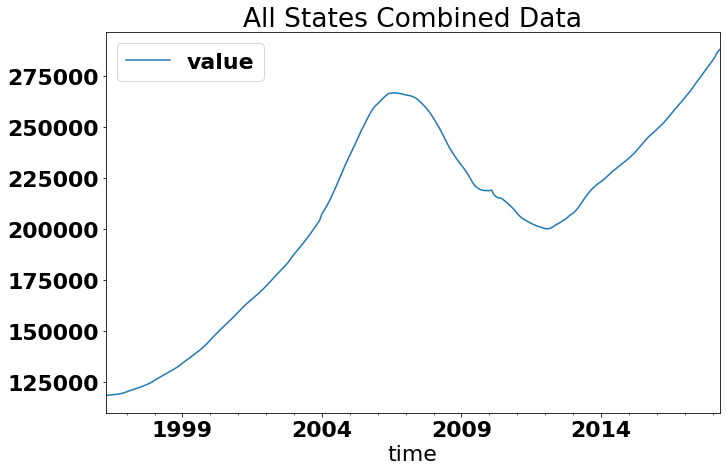

In [19]:
data_mean.plot(figsize = (11,7))
plt.legend(loc='best')
plt.title('All States Combined Data');

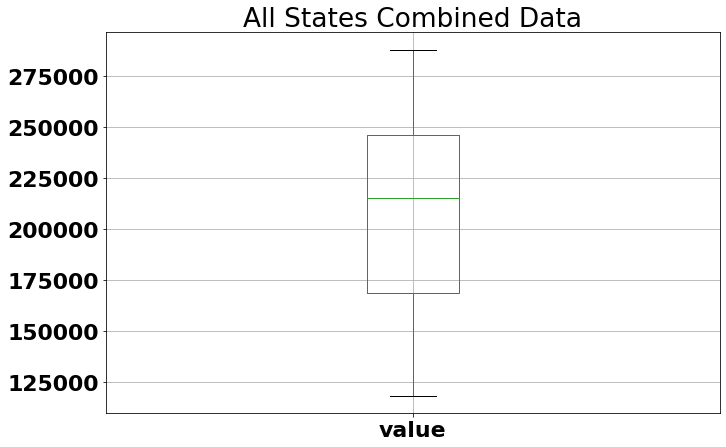

In [20]:
data_mean.boxplot(figsize = (11,7))
plt.title('All States Combined Data');

In [21]:
data[data.State=='NY']

RegionID  RegionName       City State     Metro  CountyName  SizeRank  \
6         61807       10467   New York    NY  New York       Bronx         7   
10        62037       11226   New York    NY  New York       Kings        11   
12        62087       11375   New York    NY  New York      Queens        13   
13        62045       11235   New York    NY  New York       Kings        14   
20        61625       10011   New York    NY  New York    New York        21   
...         ...         ...        ...   ...       ...         ...       ...   
14663     62430       12153  Sand Lake    NY    Albany  Rensselaer     14664   
14693     62433       12156   Schodack    NY    Albany  Rensselaer     14694   
14702     62599       12480  Shandaken    NY  Kingston      Ulster     14703   
14715     62556       12429     Esopus    NY  Kingston      Ulster     14716   
14717     62697       12720     Bethel    NY       NaN    Sullivan     14718   

        1996-04   1996-05   1996-06  ...   2017-07   2017-08   2017-09  \
6      152900.0  152700.0  152600.0  ...    394400    400000    407300   
10     162000.0  162300.0  162600.0  ...    860200    851000    853900   
12     252400.0  251800.0  251400.0  ...   1022600   1033700   1048600   
13     190500.0  191000.0  191500.0  ...    767300    777300    788800   
20          NaN       NaN       NaN  ...  12137600  12112600  12036600   
...         ...       ...       ...  ...       ...       ...       ...   
14663   95700.0   95000.0   94300.0  ...    191000    191700    192000   
14693   94400.0   94600.0   94800.0  ...    188600    189800    189600   
14702   70900.0   70400.0   70000.0  ...    160100    160600    160500   
14715   78300.0   78300.0   78200.0  ...    164200    166600    170000   
14717   62500.0   62600.0   62700.0  ...    122200    122700    122300   

        2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
6        411600    413200    414300    413900    411400    413200    417900  
10       870000    885100    887800    890500    901700    930700    963200  
12      1066400   1081200   1088800   1092700   1089500   1084000   1084600  
13       793900    796000    799700    806600    810600    813400    816200  
20     12050100  12016300  11946500  11978100  11849300  11563000  11478300  
...         ...       ...       ...       ...       ...       ...       ...  
14663    193100    195400    198300    200500    202600    205200    207300  
14693    190500    191100    192000    193600    196100    198000    199400  
14702    160100    159900    159000    157000    157700    161000    163700  
14715    171000    170700    171300    172400    173600    175800    177500  
14717    122000    122200    122800    123200    123200    120700    117700  

[1015 rows x 272 columns]

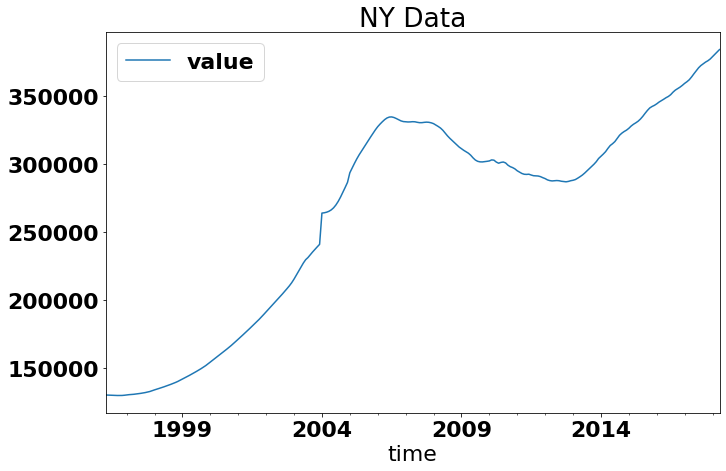

In [22]:
data_NY_mean = melt_data(data[data.State=='NY'])
data_NY_mean.plot(figsize = (11,7))
plt.legend(loc='best')
plt.title('NY Data');

In [23]:
data[data.State=='ND']

RegionID  RegionName         City State        Metro   CountyName  \
275       83519       58103        Fargo    ND        Fargo         Cass   
796       83520       58104        Fargo    ND        Fargo         Cass   
854       83532       58201  Grand Forks    ND  Grand Forks  Grand Forks   
1884      83515       58078   West Fargo    ND        Fargo         Cass   
2040      83786       58701        Minot    ND        Minot         Ward   
2078      83708       58503     Bismarck    ND     Bismarck     Burleigh   
2107      83518       58102        Fargo    ND        Fargo         Cass   
2452      83850       58801    Williston    ND    Williston     Williams   
2691      83706       58501     Bismarck    ND     Bismarck     Burleigh   
2822      83754       58601    Dickinson    ND    Dickinson        Stark   
3278      83732       58554       Mandan    ND     Bismarck       Morton   
3507      83709       58504     Bismarck    ND     Bismarck     Burleigh   
4445      83788       58703        Minot    ND        Minot         Ward   
5679      83644       58401    Jamestown    ND    Jamestown     Stutsman   
5974      83534       58203  Grand Forks    ND  Grand Forks  Grand Forks   
7902      83593       58301  Devils Lake    ND          NaN       Ramsey   
8815      83512       58075     Wahpeton    ND     Wahpeton     Richland   
8926      83510       58072  Valley City    ND          NaN       Barnes   
10315     83559       58237      Grafton    ND          NaN        Walsh   
11167     83599       58318    Bottineau    ND          NaN    Bottineau   
11575     83631       58368        Rugby    ND          NaN       Pierce   
12243     83489       58047       Horace    ND        Fargo         Cass   
12759     83686       58474        Oakes    ND          NaN       Dickey   
12985     83546       58220     Cavalier    ND          NaN      Pembina   
13238     83467       58012    Casselton    ND        Fargo         Cass   
13360     83572       58257     Mayville    ND          NaN       Traill   
13621     83582       58270   Park River    ND          NaN        Walsh   
13740     83738       58563    New Salem    ND     Bismarck       Morton   
14021     83663       58436    Ellendale    ND          NaN       Dickey   
14489     83499       58059     Mapleton    ND        Fargo         Cass   
14548     83485       58042      Harwood    ND        Fargo         Cass   

       SizeRank  1996-04  1996-05  1996-06  ...  2017-07  2017-08  2017-09  \
275         276      NaN      NaN      NaN  ...   190600   191100   191300   
796         797      NaN      NaN      NaN  ...   298600   297800   297200   
854         855      NaN      NaN      NaN  ...   224800   225700   226300   
1884       1885      NaN      NaN      NaN  ...   243500   244200   244600   
2040       2041      NaN      NaN      NaN  ...   235100   235500   236100   
2078       2079      NaN      NaN      NaN  ...   332700   334200   336000   
2107       2108      NaN      NaN      NaN  ...   190800   190600   190600   
2452       2453      NaN      NaN      NaN  ...   229200   231800   233400   
2691       2692      NaN      NaN      NaN  ...   226500   225900   225300   
2822       2823      NaN      NaN      NaN  ...   255700   254700   253400   
3278       3279      NaN      NaN      NaN  ...   223000   223700   224100   
3507       3508      NaN      NaN      NaN  ...   259500   260100   260400   
4445       4446      NaN      NaN      NaN  ...   219900   220000   220400   
5679       5680      NaN      NaN      NaN  ...   154500   154700   154900   
5974       5975      NaN      NaN      NaN  ...   165500   166100   166500   
7902       7903      NaN      NaN      NaN  ...   140000   140300   140200   
8815       8816      NaN      NaN      NaN  ...   133800   134000   134100   
8926       8927      NaN      NaN      NaN  ...   142600   143500   144500   
10315     10316      NaN      NaN      NaN  ...    82800    82800    83200   
11167     1116

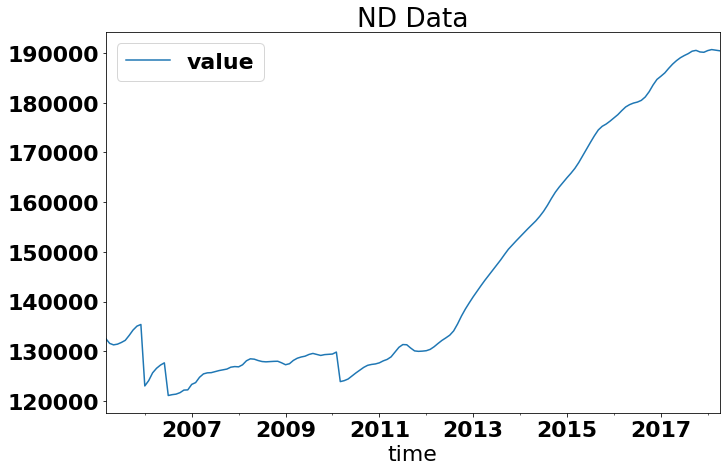

In [24]:
data_ND_mean = melt_data(data[data.State=='ND'])
data_ND_mean.plot(figsize = (11,7))
plt.legend(loc='best')
plt.title('ND Data');

In [25]:
data_ND_mean

value
time                     
2005-03-01  132576.923077
2005-04-01  131592.307692
2005-05-01  131292.307692
2005-06-01  131430.769231
2005-07-01  131769.230769
...                   ...
2017-12-01  190132.258065
2018-01-01  190477.419355
2018-02-01  190677.419355
2018-03-01  190554.838710
2018-04-01  190441.935484

[158 rows x 1 columns]

#### Data for most states starts at 1996/04/01. However, ND data starts at 2005/03/01 and is missing data for 1996/04/01-2005/02/01 period. Will need to exclude ND from all states combined graphs.

In [26]:
state_list = data.State.unique()  # create a list of all states in the data
state_list

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'ND', 'MN', 'AL',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV',
       'IA', 'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [27]:
state_list_exND = list(state_list)
state_list_exND.remove('ND')   # create a list of all states in the data, excluding ND

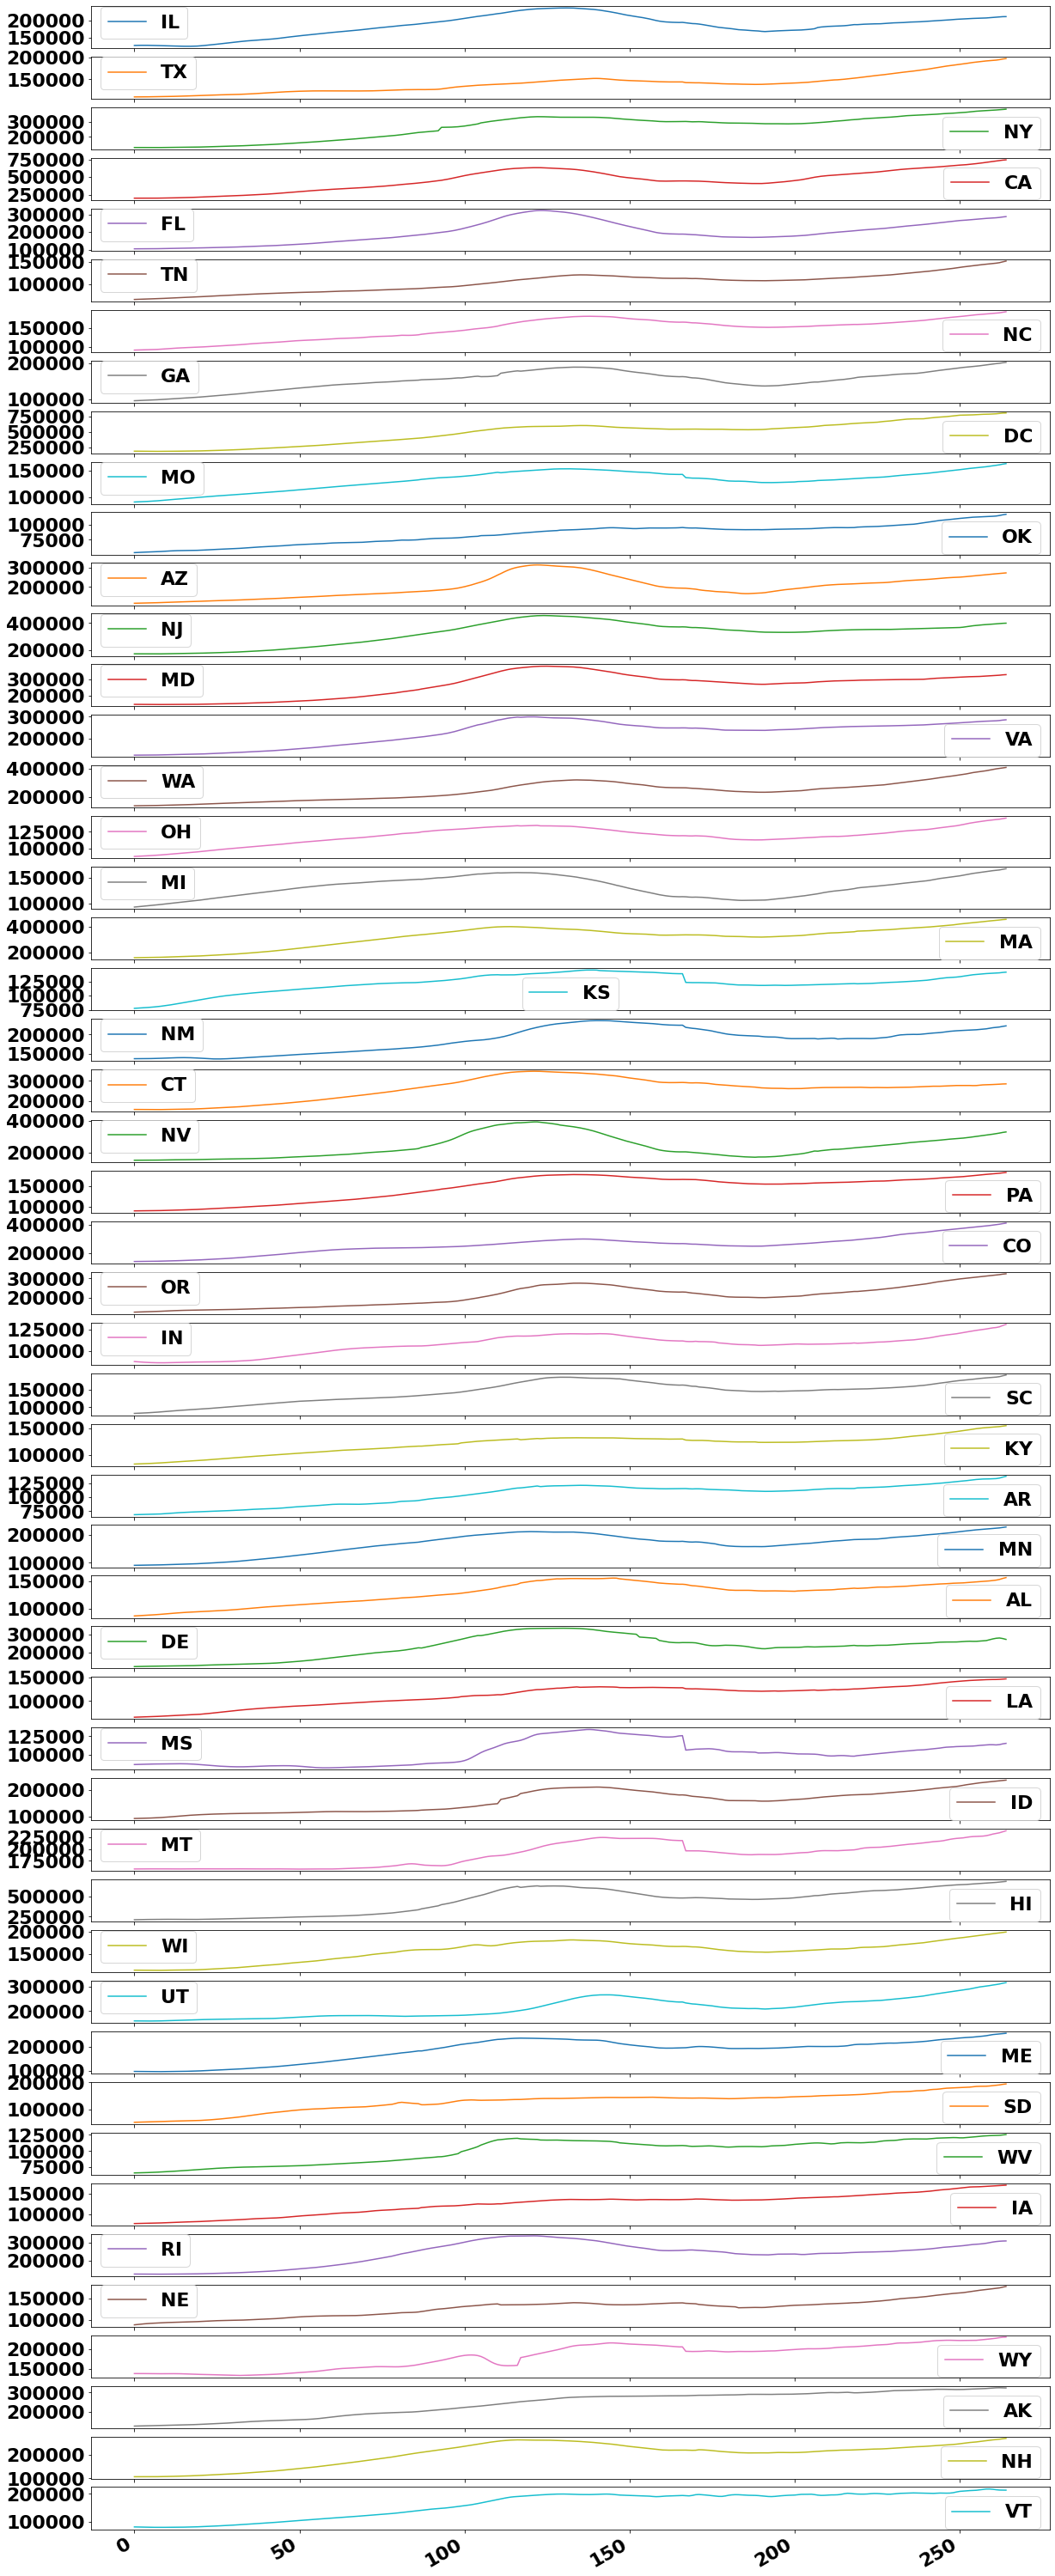

In [28]:
 # Create a new DataFrame and store values by states (excluding ND) in columns 
data_state = pd.DataFrame()
for state in state_list_exND:
    data_state[state] = melt_data(data[data.State==state]).value.ravel()

# Plot the state groups as subplots
data_state.plot(figsize = (20,60), subplots=True, legend=True);

In [29]:
datetimes

DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


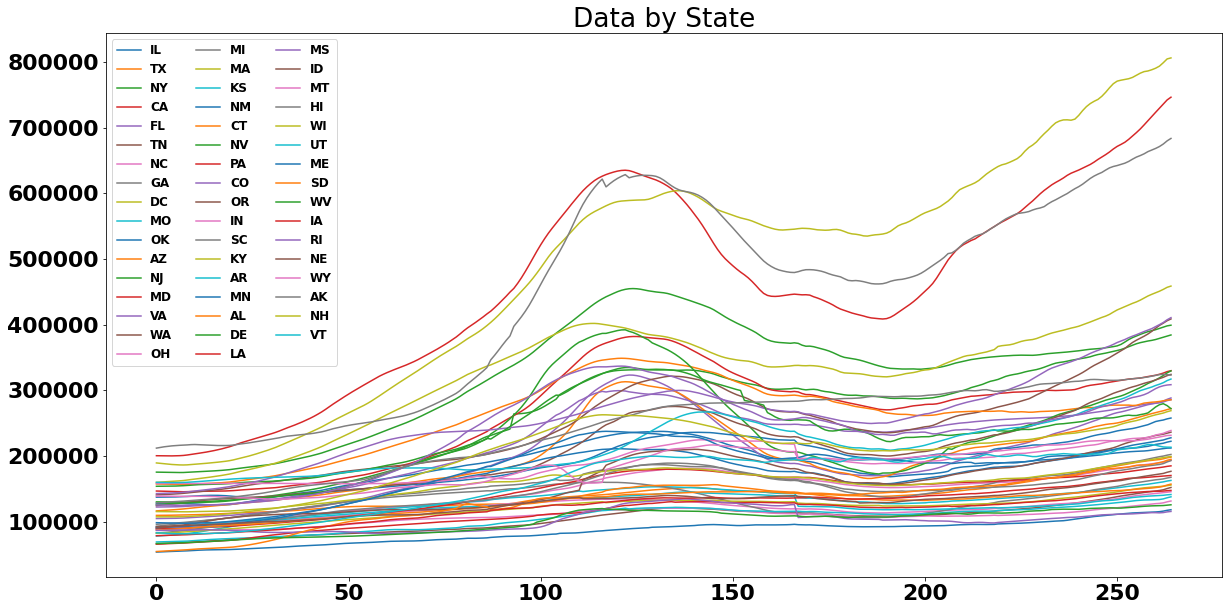

In [30]:
# Plot all states on the same graph
data_state.plot(figsize = (20,10), subplots=False, legend=True).legend(prop={"size":12}, ncol=3)
# plt.xticks(list(datetimes))
plt.title('Data by State');

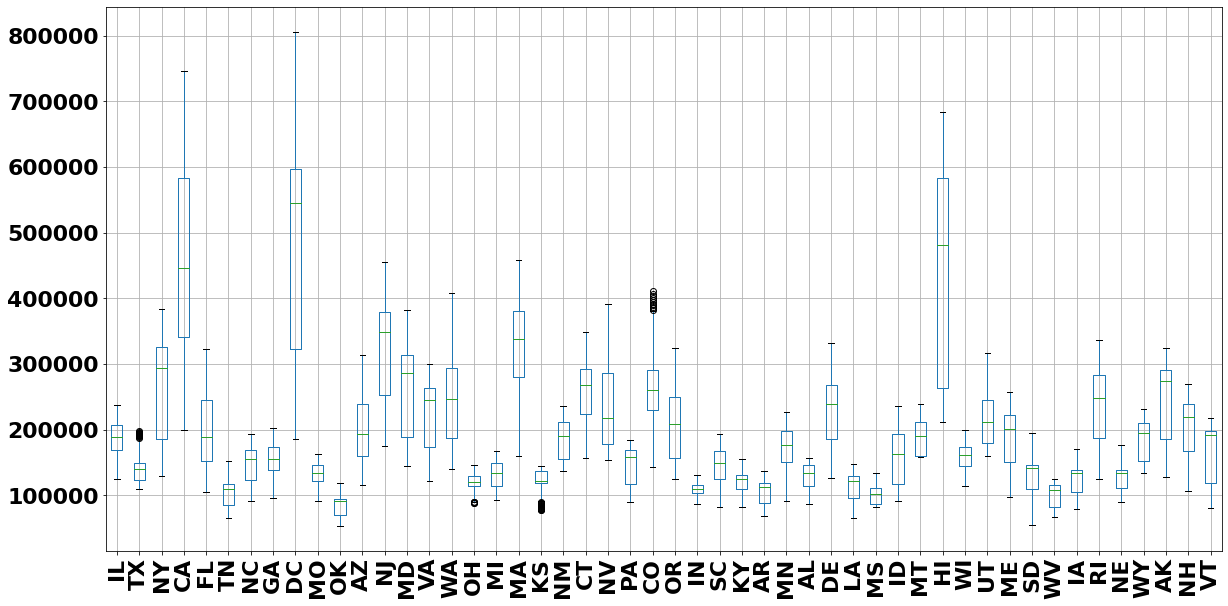

In [31]:
# Generate a box and whiskers plot for states
data_state.boxplot(figsize = (20,10), rot=90);

In [32]:
# Top 5 July 2019 Population Estimate
CA_population = 39,512,223
TX_population = 28,995,881
FL_population = 21,477,737
NY_population = 19,453,561
IL_population = 12,671,821

# Step 5: ARIMA Modeling for CA, NY, TX

## Part 1: Time series for CA

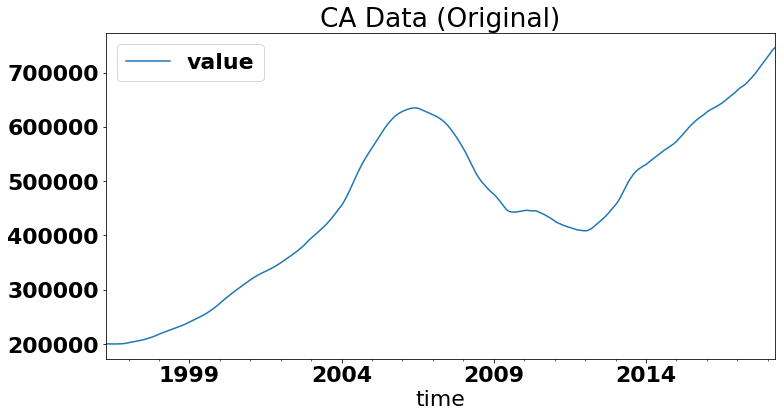

In [33]:
data_CA_mean = melt_data(data[data.State=='CA'])
data_CA_mean.plot(figsize = (12,6))
plt.title('CA Data (Original)');

In [34]:
data_CA_mean

value
time                     
1996-04-01  200220.959596
1996-05-01  200124.831650
1996-06-01  200035.942761
1996-07-01  199965.572391
1996-08-01  199958.754209
...                   ...
2017-12-01  723263.480392
2018-01-01  729496.405229
2018-02-01  735525.980392
2018-03-01  742146.323529
2018-04-01  746329.084967

[265 rows x 1 columns]

### Create a stationarity check

In [35]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs

def stationarity_check(TS):
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=12, center=False).mean()
    roll_std = TS.rolling(window=12, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

### Stationarity check for original CA data

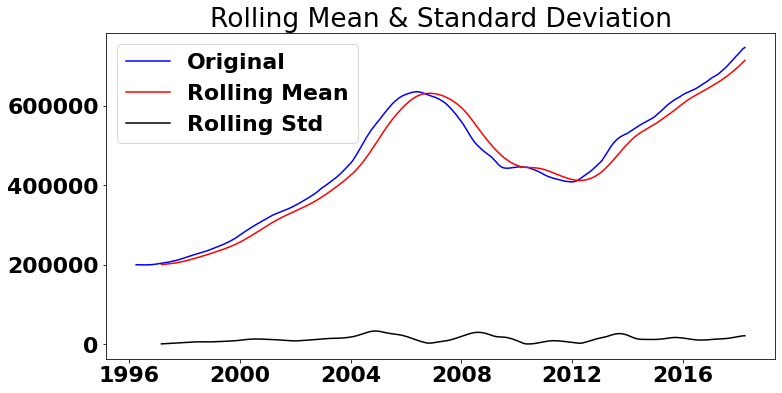

Results of Dickey-Fuller Test: 

Test Statistic                  -1.397211
p-value                          0.583613
#Lags Used                      12.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


In [36]:
stationarity_check(data_CA_mean)

#### The time series is not stationary, as the p-value is substantial (0.58 instead of smaller than the typical threshold value 0.05).

### Log transform the time series

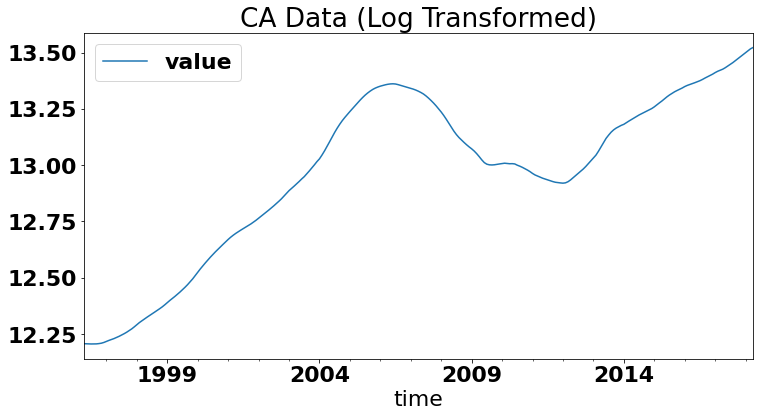

In [37]:
data_CA_mean_log = np.log(data_CA_mean)
data_CA_mean_log.plot(figsize = (12,6))
plt.title('CA Data (Log Transformed)');

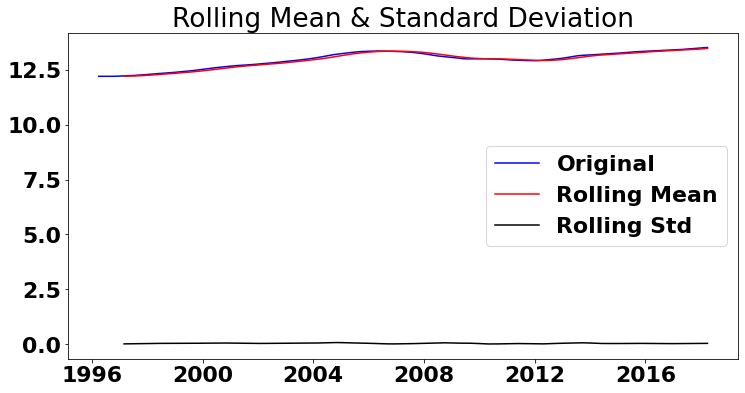

Results of Dickey-Fuller Test: 

Test Statistic                  -1.939133
p-value                          0.313882
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [38]:
stationarity_check(data_CA_mean_log)

#### The time series is not stationary, as the p-value is substantial (0.31 instead of smaller than the typical threshold value 0.05).

### Subtracting the rolling mean

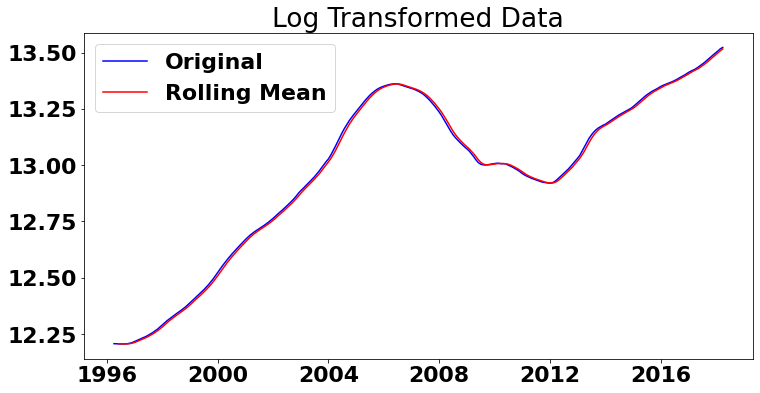

In [39]:
CA_roll_mean = np.log(data_CA_mean).rolling(window=3).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(np.log(data_CA_mean), color='blue', label='Original')
plt.plot(CA_roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [40]:
# Subtract the moving average from the log transformed data
CA_data_minus_roll_mean = np.log(data_CA_mean) - CA_roll_mean

# Drop the missing values
CA_data_minus_roll_mean.dropna(inplace=True)

# Print the first 10 rows
CA_data_minus_roll_mean.head()

value
time                
1996-06-01 -0.000456
1996-07-01 -0.000383
1996-08-01 -0.000140
1996-09-01  0.000252
1996-10-01  0.000929

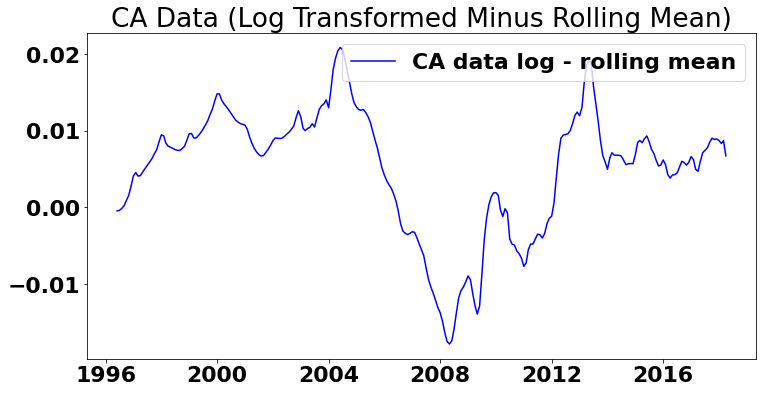

In [41]:
fig = plt.figure(figsize=(12,6))
plt.plot(CA_data_minus_roll_mean, color='blue',label='CA data log - rolling mean')
plt.legend(loc='best')
plt.title('CA Data (Log Transformed Minus Rolling Mean)');

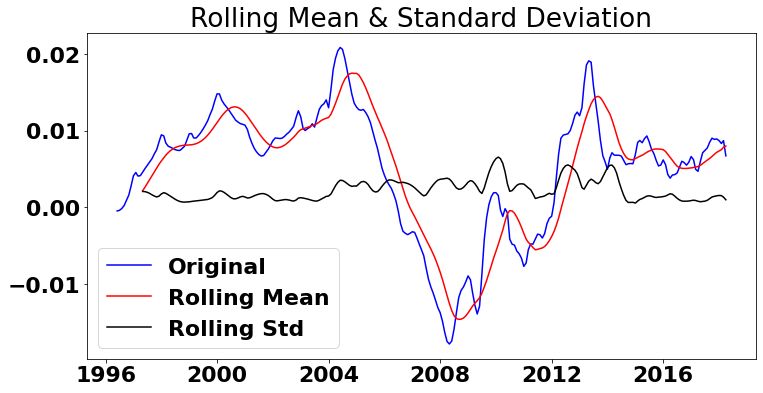

Results of Dickey-Fuller Test: 

Test Statistic                  -2.515085
p-value                          0.111847
#Lags Used                      10.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


In [42]:
stationarity_check(CA_data_minus_roll_mean)

#### The time series is not stationary, as the p-value of 0.11 is higher than the typical threshold value 0.05.

### Differencing

In [43]:
# Difference your data
CA_data_diff = CA_data_minus_roll_mean.diff()

# Drop the missing values
CA_data_diff.dropna(inplace=True)

# Check out the first few rows
CA_data_diff.head()

value
time                
1996-07-01  0.000074
1996-08-01  0.000243
1996-09-01  0.000392
1996-10-01  0.000677
1996-11-01  0.000687

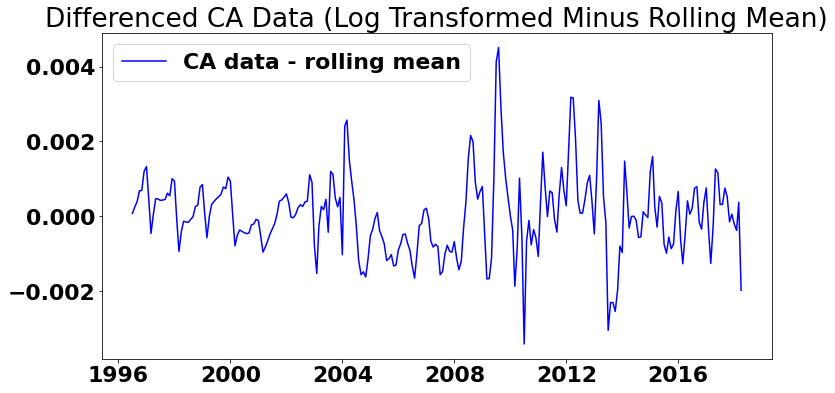

In [44]:
fig = plt.figure(figsize=(12,6))
plt.plot(CA_data_diff, color='blue',label='CA data - rolling mean')
plt.legend(loc='best')
plt.title('Differenced CA Data (Log Transformed Minus Rolling Mean)');

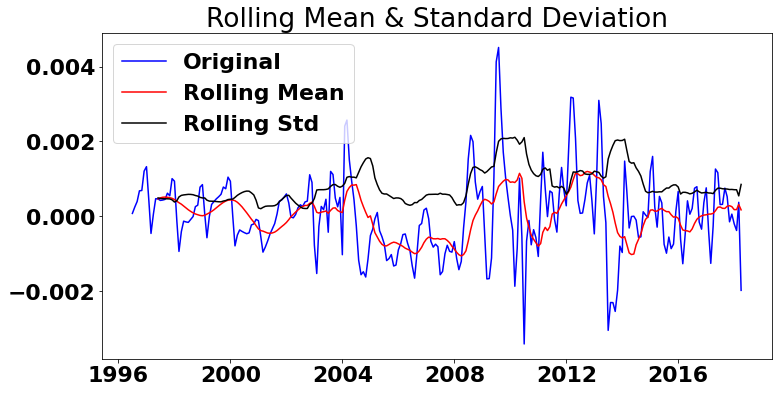

Results of Dickey-Fuller Test: 

Test Statistic                  -4.111630
p-value                          0.000927
#Lags Used                      13.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [45]:
stationarity_check(CA_data_diff)

#### The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! But let's try to difference this data again.

### Differencing (again)

In [46]:
# Difference your data
CA_data_diff_2 = CA_data_diff.diff()

# Drop the missing values
CA_data_diff_2.dropna(inplace=True)

# Check out the first few rows
CA_data_diff_2.head()

value
time                
1996-08-01  0.000169
1996-09-01  0.000149
1996-10-01  0.000286
1996-11-01  0.000010
1996-12-01  0.000517

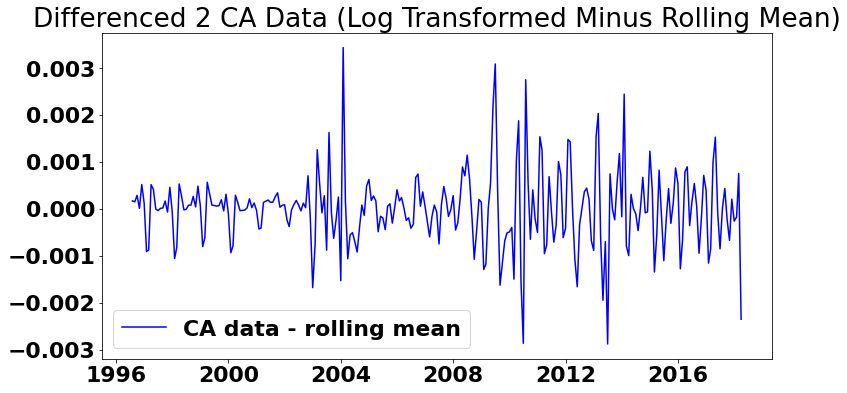

In [47]:
fig = plt.figure(figsize=(12,6))
plt.plot(CA_data_diff_2, color='blue',label='CA data - rolling mean')
plt.legend(loc='best')
plt.title('Differenced 2 CA Data (Log Transformed Minus Rolling Mean)');

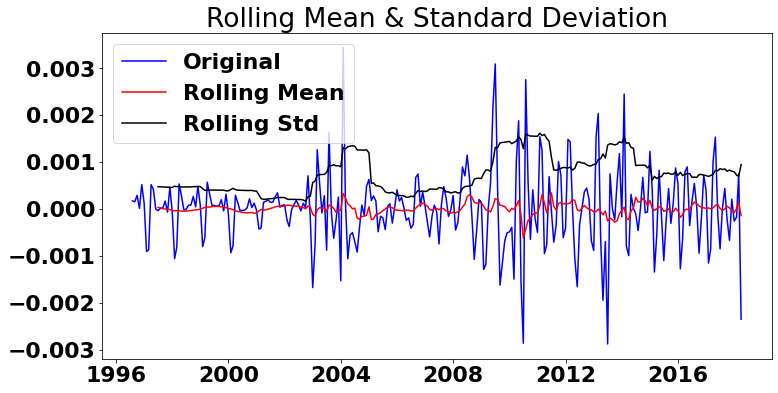

Results of Dickey-Fuller Test: 

Test Statistic                -9.674298e+00
p-value                        1.252710e-16
#Lags Used                     8.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64


In [48]:
stationarity_check(CA_data_diff_2)

#### The outcome of differencing data twice is better for stationarity. Let's try modeling with d=1,2.

### ACF and PACF for CA data log - rolling mean differenced once

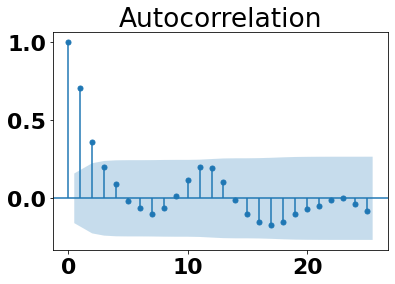

In [49]:
plot_acf(CA_data_diff['value'], alpha=.01);

#### Based on ACF graph above, we need to include up to q=3 terms in ARIMA

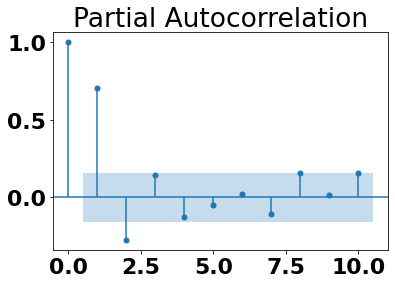

In [50]:
plot_pacf(CA_data_diff['value'], alpha=.01, lags=10);

#### Based on PACF graph above, we need to include p=2,3,4 terms in ARIMA

### ACF and PACF for CA data log - rolling mean differenced twice

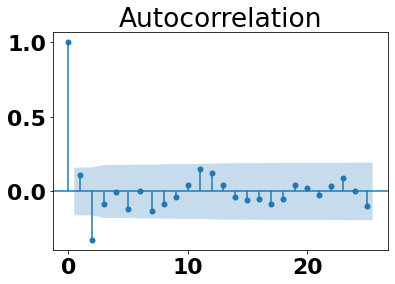

In [51]:
plot_acf(CA_data_diff_2['value'], alpha=.01);

#### Based on ACF graph above, we need to include up to q=3 terms in ARIMA

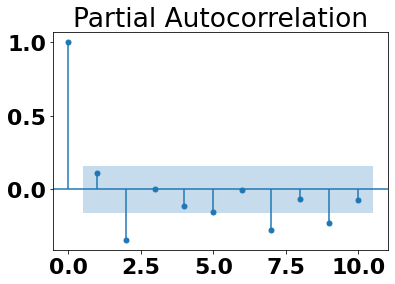

In [52]:
plot_pacf(CA_data_diff_2['value'], alpha=.01, lags=10);

#### Based on PACF graph above, we need to include p=2,3,4 terms in ARIMA

### Train test split the data

In [53]:
CA_data_minus_roll_mean_train = CA_data_minus_roll_mean[:round(len(CA_data_minus_roll_mean) * 0.8)]
CA_data_minus_roll_mean_test = CA_data_minus_roll_mean[round(len(CA_data_minus_roll_mean) * 0.8):]
CA_data_minus_roll_mean_test.shape

(53, 1)

### ARIMA with order=(1,1,1)

In [54]:
model_CA_1=ARIMA(CA_data_minus_roll_mean_train, order=(1,1,1))
model_CA_1_fit = model_CA_1.fit(disp=0)
print(model_CA_1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1221.749
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 11 Mar 2021   AIC                          -2435.497
Time:                        18:51:32   BIC                          -2422.128
Sample:                    07-01-1996   HQIC                         -2430.092
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.037e-05      0.000      0.125      0.901      -0.000       0.000
ar.L1.D.value     0.5634      0.067      8.435      0.000       0.433       0.694
ma.L1.D.value     0.4890      0.065     

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

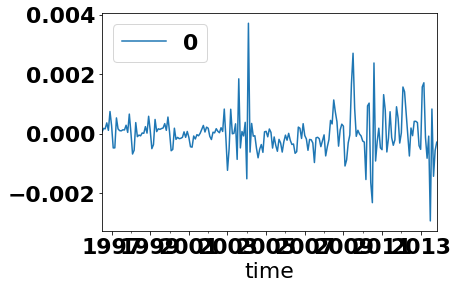

In [55]:
residuals = pd.DataFrame(model_CA_1_fit.resid)
residuals.plot();

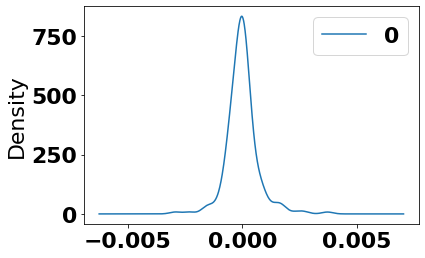

In [56]:
residuals.plot(kind='kde');

In [57]:
model_CA_1_fit.forecast(53)[0]

array([0.00551332, 0.00482192, 0.00444126, 0.00423567, 0.00412873,
       0.00407738, 0.00405733, 0.00405494, 0.00406248, 0.00407562,
       0.00409193, 0.00411   , 0.00412909, 0.00414873, 0.0041687 ,
       0.00418884, 0.00420908, 0.00422938, 0.00424972, 0.00427007,
       0.00429043, 0.0043108 , 0.00433117, 0.00435154, 0.00437191,
       0.00439228, 0.00441266, 0.00443303, 0.00445341, 0.00447378,
       0.00449415, 0.00451453, 0.0045349 , 0.00455528, 0.00457565,
       0.00459603, 0.0046164 , 0.00463678, 0.00465715, 0.00467752,
       0.0046979 , 0.00471827, 0.00473865, 0.00475902, 0.0047794 ,
       0.00479977, 0.00482014, 0.00484052, 0.00486089, 0.00488127,
       0.00490164, 0.00492202, 0.00494239])

In [58]:
print('AIC:', model_CA_1_fit.aic)
print('RMSE:', np.sqrt(mean_squared_error(CA_data_minus_roll_mean_test, model_CA_1_fit.forecast(53)[0])))

AIC: -2435.4973624458685
RMSE: 0.002617082367017149


In [59]:
datetimes[-53:]

DatetimeIndex(['2013-12-01', '2014-01-01', '2014-02-01', '2014-03-01',
               '2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01'],
              dtype='datetime64[ns]', freq=None

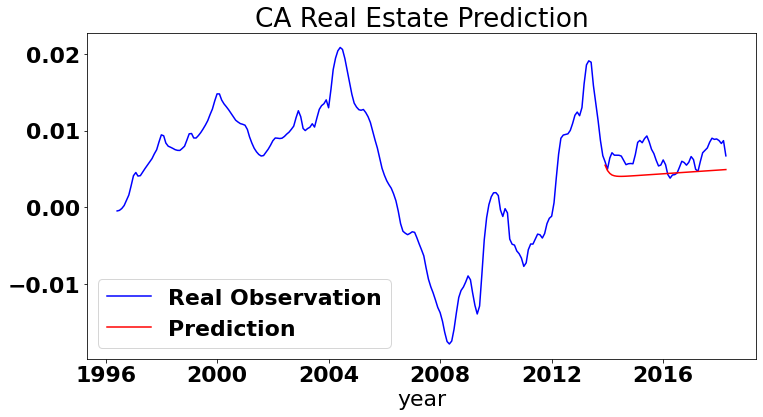

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(CA_data_minus_roll_mean, color='blue')
ax.plot(datetimes[-53:], model_CA_1_fit.forecast(53)[0], color='red')
plt.xlabel('year')
plt.title('CA Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

### Grid search for hyperparameters with ARIMA

In [61]:
orderlist = []
aiclist = []
rmselist = []
badlist = []
for p in range(0,5):
    for d in range(1,3):
        for q in range(0,4):
            try:
                ordernow = (p,d,q)
                arimax_now = ARIMA(CA_data_minus_roll_mean_train, order=ordernow).fit(disp=0)
                orderlist.append(ordernow)
                aiclist.append(arimax_now.aic)
                rmselist.append(np.sqrt(mean_squared_error(CA_data_minus_roll_mean_test, arimax_now.forecast(53)[0])))
            except:
                badlist.append(ordernow)
                continue

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore'

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

In [62]:
badlist

[(3, 2, 3), (4, 2, 3)]

In [63]:
df_arima = pd.DataFrame()
df_arima['order'], df_arima['aic'], df_arima['rmse'] = orderlist, aiclist, rmselist

In [64]:
df_arima.sort_values('aic')

order          aic      rmse
26  (3, 1, 2) -2447.119462  0.002245
34  (4, 1, 3) -2445.577563  0.004282
33  (4, 1, 2) -2445.312527  0.002025
27  (3, 1, 3) -2445.232004  0.002132
9   (1, 1, 1) -2435.497362  0.002617
31  (4, 1, 0) -2433.878392  0.001523
18  (2, 1, 2) -2433.661706  0.004209
10  (1, 1, 2) -2433.636956  0.002312
17  (2, 1, 1) -2433.588410  0.002405
11  (1, 1, 3) -2432.809046  0.002585
25  (3, 1, 1) -2431.965533  0.002841
2   (0, 1, 2) -2431.910863  0.001484
32  (4, 1, 1) -2431.905343  0.001567
19  (2, 1, 3) -2431.670268  0.004095
24  (3, 1, 0) -2431.238525  0.003190
3   (0, 1, 3) -2429.962043  0.001469
16  (2, 1, 0) -2427.868140  0.001602
14  (1, 2, 2) -2417.979394  0.004872
22  (2, 2, 2) -2416.023769  0.004570
23  (2, 2, 3) -2415.522518  0.002172
36  (4, 2, 1) -2415.286087  0.002185
15  (1, 2, 3) -2414.230509  0.001547
29  (3, 2, 1) -2413.871666  0.006449
7   (0, 2, 3) -2413.815822  0.001822
30  (3, 2, 2) -2412.271914  0.004056
21  (2, 2, 1) -2410.077471  0.002965
37  (4, 2, 2) -2409.883509  0.005338
8   (1, 1, 0) -2407.164197  0.005577
35  (4, 2, 0) -2397.466444  0.073118
20  (2, 2, 0) -2395.523122  0.067834
6   (0, 2, 2) -2394.063961  0.071317
28  (3, 2, 0) -2393.523348  0.067850
1   (0, 1, 1) -2386.440167  0.001461
13  (1, 2, 1) -2383.868528  0.065988
5   (0, 2, 1) -2380.468181  0.060922
12  (1, 2, 0) -2373.684157  0.064198
4   (0, 2, 0) -2370.926605  0.067761
0   (0, 1, 0) -2239.152191  0.001806

### ARIMA with order=(3,1,2)
#### This is the best model according to the search above

In [65]:
model_CA_3=ARIMA(CA_data_minus_roll_mean_train, order=(3,1,2))
model_CA_3_fit = model_CA_3.fit(disp=0)
print(model_CA_3_fit.summary())

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  209
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1230.560
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 11 Mar 2021   AIC                          -2447.119
Time:                        18:51:43   BIC                          -2423.723
Sample:                    07-01-1996   HQIC                         -2437.660
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.273e-05      0.000      0.134      0.894      -0.000       0.000
ar.L1.D.value    -0.4599      0.096     -4.777      0.000      -0.649      -0.271
ar.L2.D.value     0.2664      0.095     

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='time'>

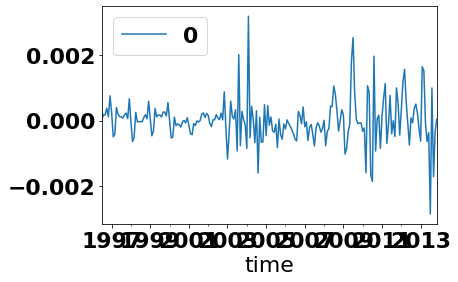

In [66]:
residuals = pd.DataFrame(model_CA_3_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

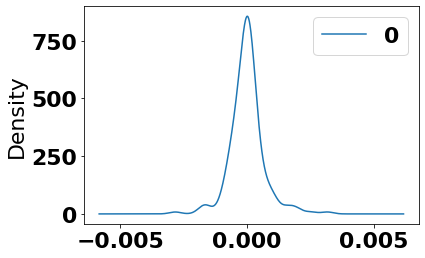

In [67]:
residuals.plot(kind='kde')

In [68]:
model_CA_3_fit.forecast(53)[0]

array([0.00617308, 0.00529242, 0.00503638, 0.00478533, 0.00461914,
       0.00458158, 0.00450881, 0.00450909, 0.00450065, 0.00450631,
       0.00452261, 0.00453544, 0.00455646, 0.00457563, 0.00459691,
       0.0046189 , 0.00464063, 0.00466324, 0.00468556, 0.00470818,
       0.00473082, 0.00475345, 0.00477617, 0.00479886, 0.00482158,
       0.0048443 , 0.00486702, 0.00488974, 0.00491247, 0.0049352 ,
       0.00495793, 0.00498065, 0.00500338, 0.00502611, 0.00504884,
       0.00507157, 0.0050943 , 0.00511703, 0.00513976, 0.00516249,
       0.00518521, 0.00520794, 0.00523067, 0.0052534 , 0.00527613,
       0.00529886, 0.00532159, 0.00534432, 0.00536705, 0.00538978,
       0.00541251, 0.00543524, 0.00545796])

In [69]:
print('AIC:', model_CA_3_fit.aic)
print('RMSE:', np.sqrt(mean_squared_error(CA_data_minus_roll_mean_test, model_CA_3_fit.forecast(53)[0])))

AIC: -2447.1194621432483
RMSE: 0.0022448494157513306


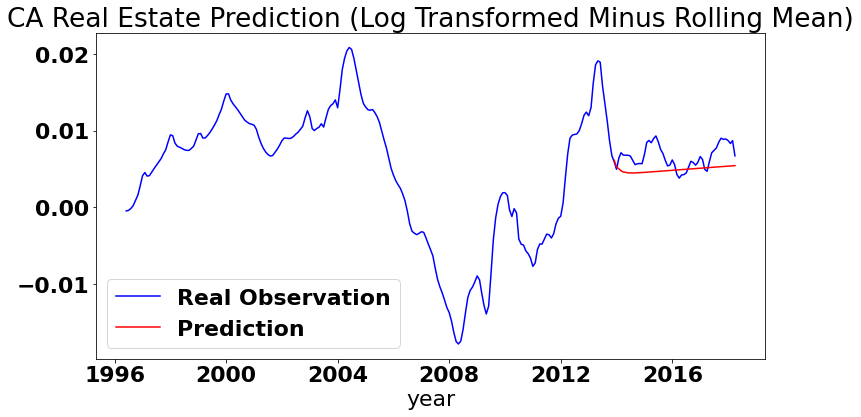

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(CA_data_minus_roll_mean, color='blue')
ax.plot(datetimes[-53:], model_CA_3_fit.forecast(53)[0], color='red')
plt.xlabel('year')
plt.title('CA Real Estate Prediction (Log Transformed Minus Rolling Mean)') 
plt.legend(('Real Observation', 'Prediction')); 

In [71]:
# Roll back rolling mean subtraction
data_CA_for_roll = list(np.log(data_CA_mean.value[:212]))
for i in model_CA_3_fit.forecast(53)[0]:
    data_CA_for_roll.append(i + sum(data_CA_for_roll[-3:])/3)

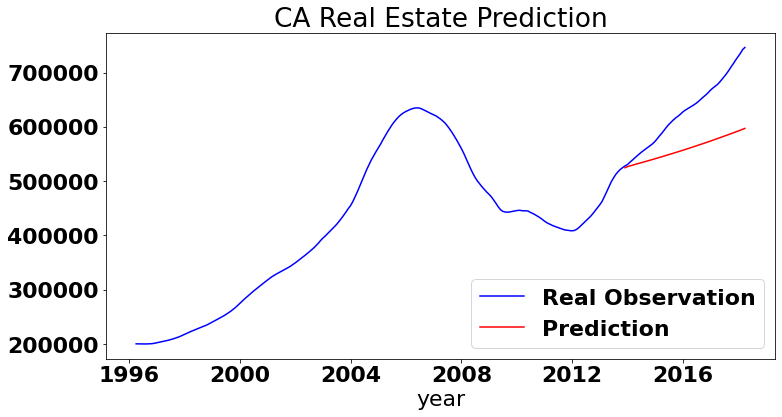

In [72]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_CA_mean, color='blue')
ax.plot(datetimes[-53:], np.exp(data_CA_for_roll)[-53:], color='red')
plt.xlabel('year')
plt.title('CA Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

## Let's calculate how much CA last predicted value was underestimated by in comparison to the real observation.

In [73]:
CA_last_train = data_CA_mean.value[-54]
CA_last_real = data_CA_mean.value[-1]
CA_last_pred = np.exp(data_CA_for_roll)[-1]
print("CA last train observation is ${:,.0f}, last real observation is ${:,.0f}, last prediction is ${:,.0f}".
      format(CA_last_train, CA_last_real, CA_last_pred))

CA_undervalue = (CA_last_real - CA_last_pred)/CA_last_train
print("CA prediction was underestimated by {:.2%}".format(CA_undervalue))

CA last train observation is $524,991, last real observation is $746,329, last prediction is $597,146
CA prediction was underestimated by 28.42%


## Part 2: Time series for NY

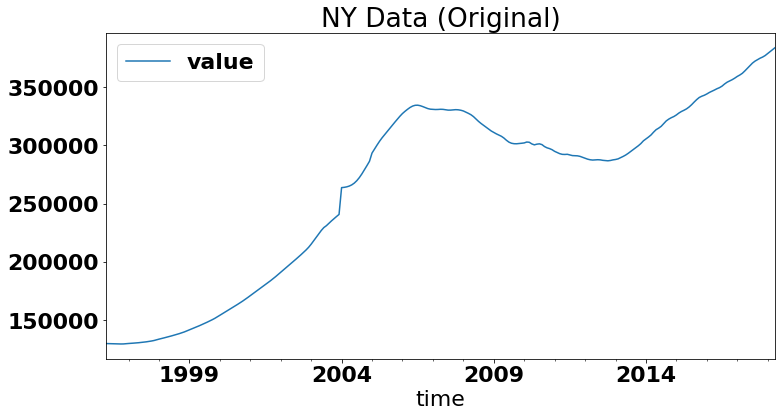

In [74]:
data_NY_mean = melt_data(data[data.State=='NY'])
data_NY_mean.plot(figsize = (12,6))
plt.title('NY Data (Original)');

In [75]:
data_NY_mean

value
time                     
1996-04-01  129927.512690
1996-05-01  129850.558376
1996-06-01  129776.142132
1996-07-01  129694.213198
1996-08-01  129623.350254
...                   ...
2017-12-01  377217.339901
2018-01-01  378981.773399
2018-02-01  380702.463054
2018-03-01  382523.152709
2018-04-01  384160.689655

[265 rows x 1 columns]

### Stationarity check for original NY data

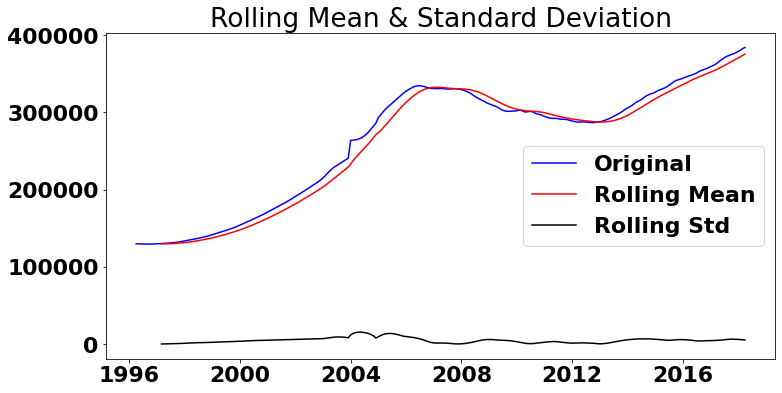

Results of Dickey-Fuller Test: 

Test Statistic                  -1.848328
p-value                          0.356746
#Lags Used                      12.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


In [76]:
stationarity_check(data_NY_mean)

#### The time series is not stationary, as the p-value is substantial (0.36 instead of smaller than the typical threshold value 0.05).

### Log transform the time series

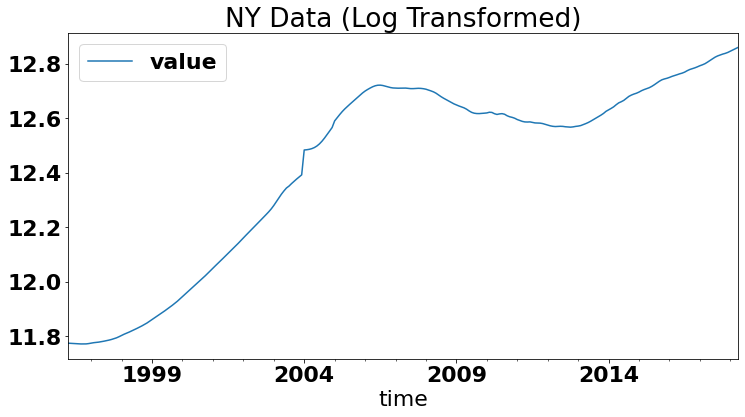

In [77]:
data_NY_mean_log = np.log(data_NY_mean)
data_NY_mean_log.plot(figsize = (12,6))
plt.title('NY Data (Log Transformed)');

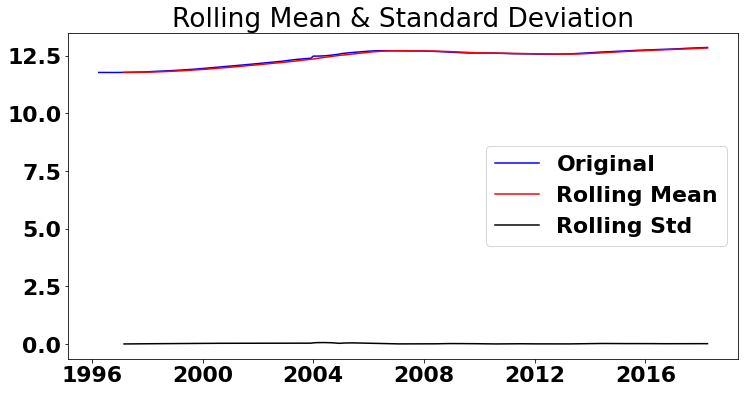

Results of Dickey-Fuller Test: 

Test Statistic                  -2.652096
p-value                          0.082701
#Lags Used                      12.000000
Number of Observations Used    252.000000
Critical Value (1%)             -3.456569
Critical Value (5%)             -2.873079
Critical Value (10%)            -2.572919
dtype: float64


In [78]:
stationarity_check(data_NY_mean_log)

#### The time series is not stationary, as the p-value of 0.08 is larger than the typical threshold value 0.05.

### Subtracting the rolling mean

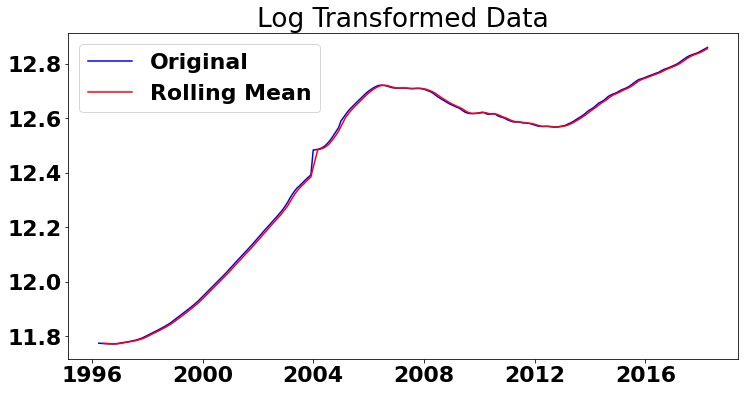

In [79]:
NY_roll_mean = np.log(data_NY_mean).rolling(window=3).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(np.log(data_NY_mean), color='blue', label='Original')
plt.plot(NY_roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [80]:
# Subtract the moving average from the log transformed data
NY_data_minus_roll_mean = np.log(data_NY_mean) - NY_roll_mean

# Drop the missing values
NY_data_minus_roll_mean.dropna(inplace=True)

# Print the first 10 rows
NY_data_minus_roll_mean.head(10)

value
time                
1996-06-01 -0.000580
1996-07-01 -0.000612
1996-08-01 -0.000575
1996-09-01 -0.000464
1996-10-01 -0.000202
1996-11-01  0.000147
1996-12-01  0.000849
1997-01-01  0.001562
1997-02-01  0.001594
1997-03-01  0.001135

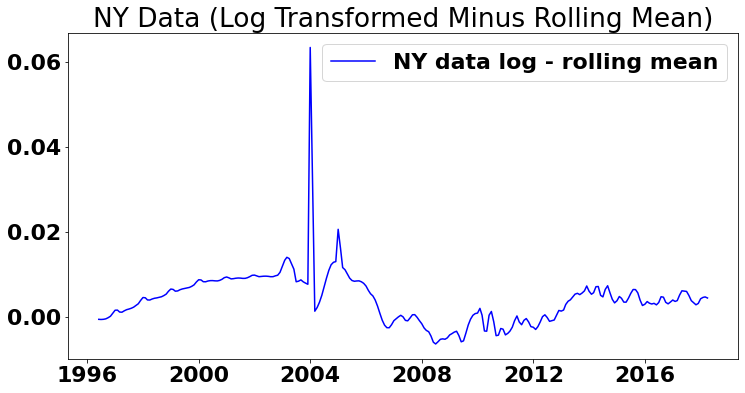

In [81]:
fig = plt.figure(figsize=(12,6))
plt.plot(NY_data_minus_roll_mean, color='blue',label='NY data log - rolling mean')
plt.legend(loc='best')
plt.title('NY Data (Log Transformed Minus Rolling Mean)');

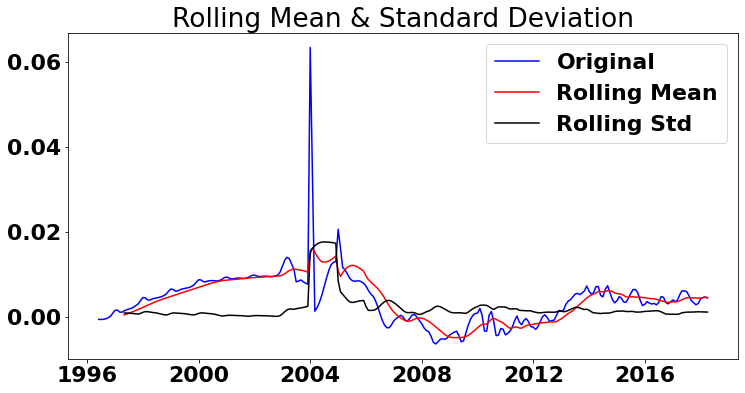

Results of Dickey-Fuller Test: 

Test Statistic                  -1.331543
p-value                          0.614621
#Lags Used                      11.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [82]:
stationarity_check(NY_data_minus_roll_mean)

#### The time series is not stationary, as the p-value of 0.61 is higher than the typical threshold value 0.05.

### Differencing

In [83]:
# Difference your data
NY_data_diff = NY_data_minus_roll_mean.diff() 

# Drop the missing values
NY_data_diff.dropna(inplace=True)

# Check out the first few rows
NY_data_diff.head()

value
time                
1996-07-01 -0.000032
1996-08-01  0.000037
1996-09-01  0.000111
1996-10-01  0.000262
1996-11-01  0.000349

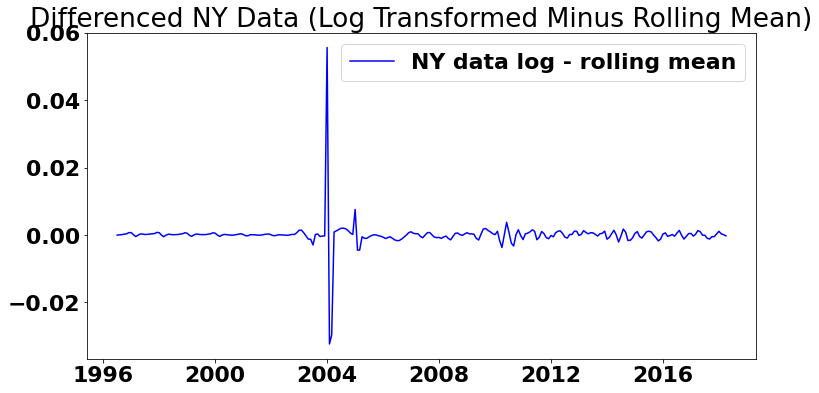

In [84]:
fig = plt.figure(figsize=(12,6))
plt.plot(NY_data_diff, color='blue',label='NY data log - rolling mean')
plt.legend(loc='best')
plt.title('Differenced NY Data (Log Transformed Minus Rolling Mean)');

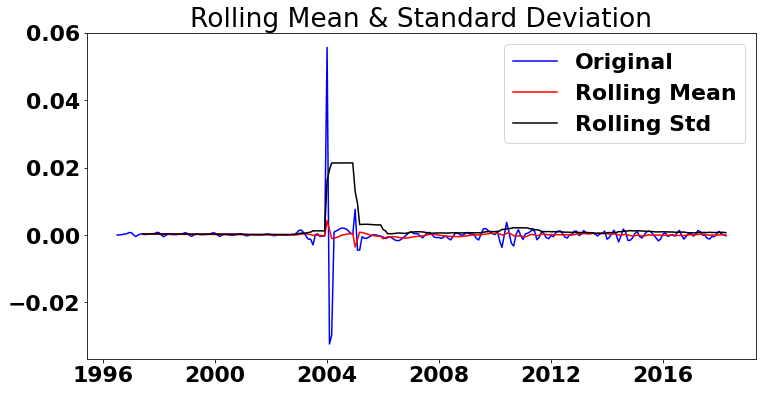

Results of Dickey-Fuller Test: 

Test Statistic                -8.383005e+00
p-value                        2.480901e-13
#Lags Used                     1.000000e+01
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


In [85]:
stationarity_check(NY_data_diff)  # if diff on data_NY_mean_log (no roling mean subtraction), p=value = 0.518379

#### The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! But let's try to difference this data again.

### Differencing (again)

In [86]:
# Difference your data
NY_data_diff_2 = NY_data_diff.diff()

# Drop the missing values
NY_data_diff_2.dropna(inplace=True)

# Check out the first few rows
NY_data_diff_2.head()

value
time                
1996-08-01  0.000070
1996-09-01  0.000073
1996-10-01  0.000151
1996-11-01  0.000087
1996-12-01  0.000353

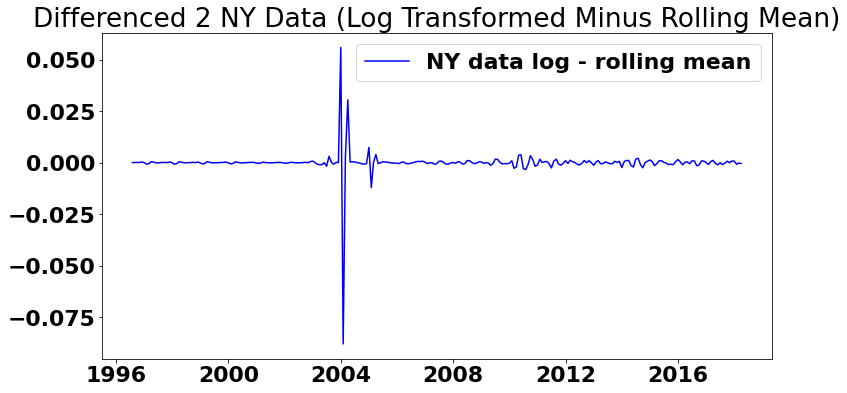

In [87]:
fig = plt.figure(figsize=(12,6))
plt.plot(NY_data_diff_2, color='blue',label='NY data log - rolling mean')
plt.legend(loc='best')
plt.title('Differenced 2 NY Data (Log Transformed Minus Rolling Mean)');

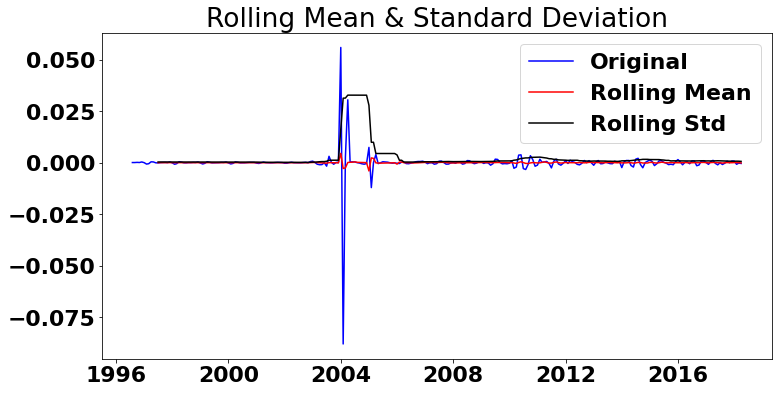

Results of Dickey-Fuller Test: 

Test Statistic                -8.717159e+00
p-value                        3.463360e-14
#Lags Used                     1.600000e+01
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


In [88]:
stationarity_check(NY_data_diff_2)

#### The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! Let's try modeling with d=1,2.

### ACF and PACF for CA data log - rolling mean differenced once

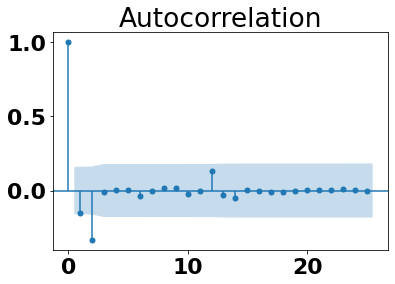

In [89]:
plot_acf(NY_data_diff['value'], alpha=.01);

#### Based on ACF graph above, we need to include up to q=3 terms in ARIMA

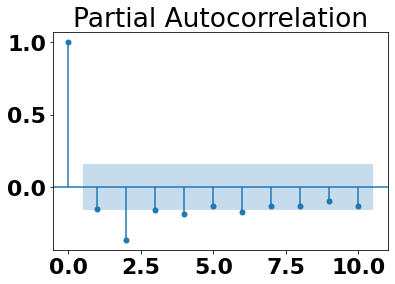

In [90]:
plot_pacf(NY_data_diff['value'], alpha=.01, lags=10);

#### Based on PACF graph above, we need to include p=2,3,4 terms in ARIMA

### ACF and PACF for CA data log - rolling mean differenced twice

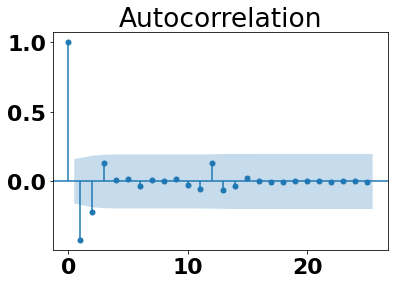

In [91]:
plot_acf(NY_data_diff_2['value'], alpha=.01);

#### Based on ACF graph above, we need to include up to q=3 terms in ARIMA

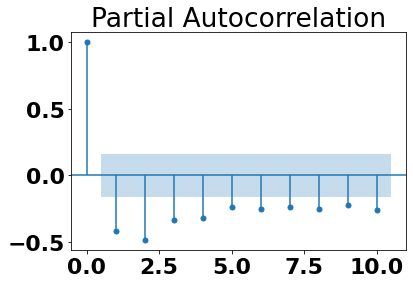

In [92]:
plot_pacf(NY_data_diff_2['value'], alpha=.01, lags=10);

#### Based on PACF graph above, we need to include p=2,3,4 terms in ARIMA

### Train test split the data

In [93]:
NY_data_minus_roll_mean_train = NY_data_minus_roll_mean[:round(len(NY_data_minus_roll_mean) * 0.8)]
NY_data_minus_roll_mean_test = NY_data_minus_roll_mean[round(len(NY_data_minus_roll_mean) * 0.8):]
NY_data_minus_roll_mean_test.shape

(53, 1)

### ARIMA with order=(1,1,1)

In [94]:
model_NY_1=ARIMA(NY_data_minus_roll_mean_train, order=(1,1,1))
model_NY_1_fit = model_NY_1.fit(disp=0)
print(model_NY_1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 834.720
Method:                       css-mle   S.D. of innovations              0.004
Date:                Thu, 11 Mar 2021   AIC                          -1661.440
Time:                        18:51:46   BIC                          -1648.070
Sample:                    07-01-1996   HQIC                         -1656.034
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.643e-05   6.68e-05      0.246      0.806      -0.000       0.000
ar.L1.D.value     0.3912      0.076      5.126      0.000       0.242       0.541
ma.L1.D.value    -0.8722      0.033    -

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

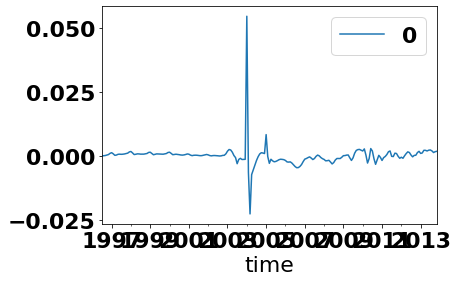

In [95]:
residuals = pd.DataFrame(model_NY_1_fit.resid)
residuals.plot();

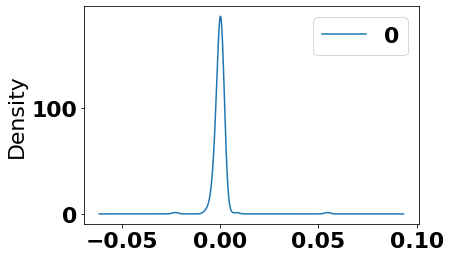

In [96]:
residuals.plot(kind='kde');

In [97]:
model_NY_1_fit.forecast(53)[0]

array([0.00479683, 0.00429242, 0.0041051 , 0.00404183, 0.00402708,
       0.00403131, 0.00404297, 0.00405753, 0.00407323, 0.00408937,
       0.00410569, 0.00412207, 0.00413848, 0.0041549 , 0.00417133,
       0.00418776, 0.00420418, 0.00422061, 0.00423704, 0.00425347,
       0.0042699 , 0.00428633, 0.00430276, 0.00431918, 0.00433561,
       0.00435204, 0.00436847, 0.0043849 , 0.00440133, 0.00441775,
       0.00443418, 0.00445061, 0.00446704, 0.00448347, 0.0044999 ,
       0.00451633, 0.00453275, 0.00454918, 0.00456561, 0.00458204,
       0.00459847, 0.0046149 , 0.00463132, 0.00464775, 0.00466418,
       0.00468061, 0.00469704, 0.00471347, 0.0047299 , 0.00474632,
       0.00476275, 0.00477918, 0.00479561])

In [98]:
print('AIC:', model_NY_1_fit.aic)
print('RMSE:', np.sqrt(mean_squared_error(NY_data_minus_roll_mean_test, model_NY_1_fit.forecast(53)[0])))

AIC: -1661.439696069796
RMSE: 0.0013961919324545192


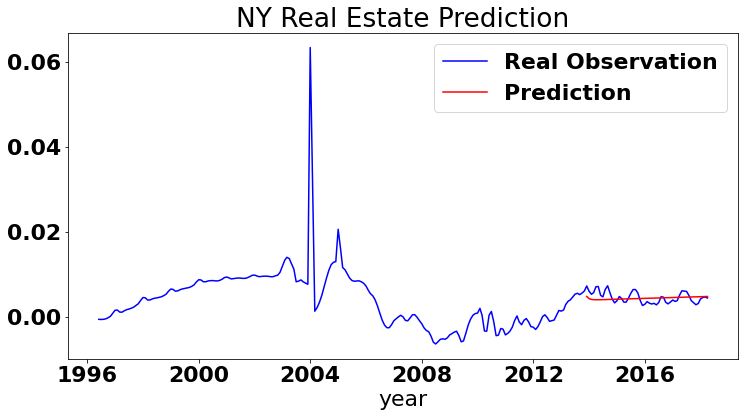

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(NY_data_minus_roll_mean, color='blue')
ax.plot(datetimes[-53:], model_NY_1_fit.forecast(53)[0], color='red')
plt.xlabel('year')
plt.title('NY Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

### Grid search for hyperparameters with ARIMA

In [100]:
orderlist = []
aiclist = []
rmselist = []
badlist = []
for p in range(0,5):
    for d in range(1,3):
        for q in range(0,5):
            try:
                ordernow = (p,d,q)
                arimax_now = ARIMA(NY_data_minus_roll_mean_train, order=ordernow).fit(disp=0)
                orderlist.append(ordernow)
                aiclist.append(arimax_now.aic)
                rmselist.append(np.sqrt(mean_squared_error(NY_data_minus_roll_mean_test, arimax_now.forecast(53)[0])))
            except:
                badlist.append(ordernow)
                continue

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

In [101]:
badlist

[(1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (4, 1, 4),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4)]

In [102]:
df_arima = pd.DataFrame()
df_arima['order'], df_arima['aic'], df_arima['rmse'] = orderlist, aiclist, rmselist

In [103]:
df_arima.sort_values('aic')

order          aic      rmse
2   (0, 1, 2) -1672.765455  0.001415
30  (4, 1, 2) -1672.036507  0.002848
3   (0, 1, 3) -1670.976947  0.001435
12  (1, 1, 2) -1670.942433  0.001431
17  (2, 1, 1) -1670.364218  0.001538
4   (0, 1, 4) -1669.390871  0.001491
18  (2, 1, 2) -1669.287967  0.001468
13  (1, 1, 3) -1668.795919  0.001414
23  (3, 1, 1) -1668.721952  0.001493
29  (4, 1, 1) -1668.542738  0.001578
24  (3, 1, 2) -1667.703581  0.001494
14  (1, 1, 4) -1667.106915  0.001440
19  (2, 1, 3) -1667.063239  0.001430
20  (2, 1, 4) -1665.371249  0.001426
25  (3, 1, 3) -1665.289190  0.001468
31  (4, 1, 3) -1664.303422  0.001509
26  (3, 1, 4) -1663.668442  0.001445
11  (1, 1, 1) -1661.439696  0.001396
8   (0, 2, 3) -1657.762377  0.026369
9   (0, 2, 4) -1655.720024  0.027134
28  (4, 1, 0) -1654.271749  0.002541
22  (3, 1, 0) -1648.994659  0.002597
16  (2, 1, 0) -1645.755758  0.002633
1   (0, 1, 1) -1638.353540  0.001952
7   (0, 2, 2) -1619.576293  0.001248
10  (1, 1, 0) -1618.269066  0.002811
0   (0, 1, 0) -1615.327493  0.002871
6   (0, 2, 1) -1599.243068  0.001716
32  (4, 2, 0) -1563.518245  0.009455
27  (3, 2, 0) -1545.048477  0.009409
21  (2, 2, 0) -1523.973722  0.011163
15  (1, 2, 0) -1471.432410  0.017703
5   (0, 2, 0) -1432.759475  0.019195

### ARIMA with order=(0,1,2)
#### This is the best model according to the search above

In [104]:
model_NY_3=ARIMA(NY_data_minus_roll_mean_train, order=(0,1,2))
model_NY_3_fit = model_NY_3.fit(disp=0)
print(model_NY_3_fit.summary())

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  209
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 840.383
Method:                       css-mle   S.D. of innovations              0.004
Date:                Thu, 11 Mar 2021   AIC                          -1672.765
Time:                        18:51:57   BIC                          -1659.396
Sample:                    07-01-1996   HQIC                         -1667.360
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.794e-05   6.62e-05      0.271      0.786      -0.000       0.000
ma.L1.D.value    -0.3684      0.063     -5.823      0.000      -0.492      -0.244
ma.L2.D.value    -0.4170      0.061     

<AxesSubplot:xlabel='time'>

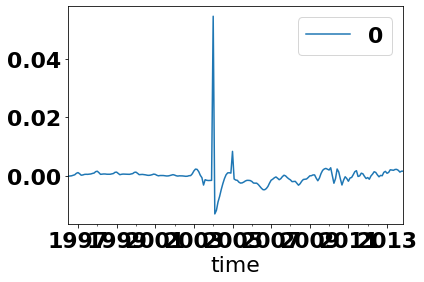

In [105]:
residuals = pd.DataFrame(model_NY_3_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

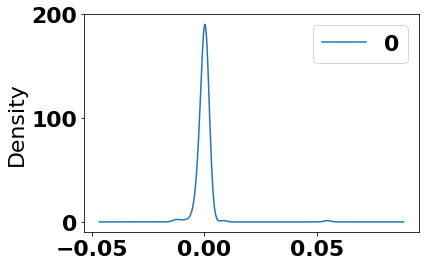

In [106]:
residuals.plot(kind='kde')

In [107]:
model_NY_3_fit.forecast(53)[0]

array([0.00482375, 0.00414716, 0.0041651 , 0.00418304, 0.00420098,
       0.00421892, 0.00423686, 0.0042548 , 0.00427274, 0.00429068,
       0.00430861, 0.00432655, 0.00434449, 0.00436243, 0.00438037,
       0.00439831, 0.00441625, 0.00443419, 0.00445213, 0.00447007,
       0.00448801, 0.00450595, 0.00452389, 0.00454183, 0.00455977,
       0.00457771, 0.00459565, 0.00461359, 0.00463153, 0.00464947,
       0.00466741, 0.00468535, 0.00470329, 0.00472122, 0.00473916,
       0.0047571 , 0.00477504, 0.00479298, 0.00481092, 0.00482886,
       0.0048468 , 0.00486474, 0.00488268, 0.00490062, 0.00491856,
       0.0049365 , 0.00495444, 0.00497238, 0.00499032, 0.00500826,
       0.0050262 , 0.00504414, 0.00506208])

In [108]:
print('AIC:', model_NY_3_fit.aic)
print('RMSE:', np.sqrt(mean_squared_error(NY_data_minus_roll_mean_test, model_NY_3_fit.forecast(53)[0])))

AIC: -1672.7654549272634
RMSE: 0.0014150135072142638


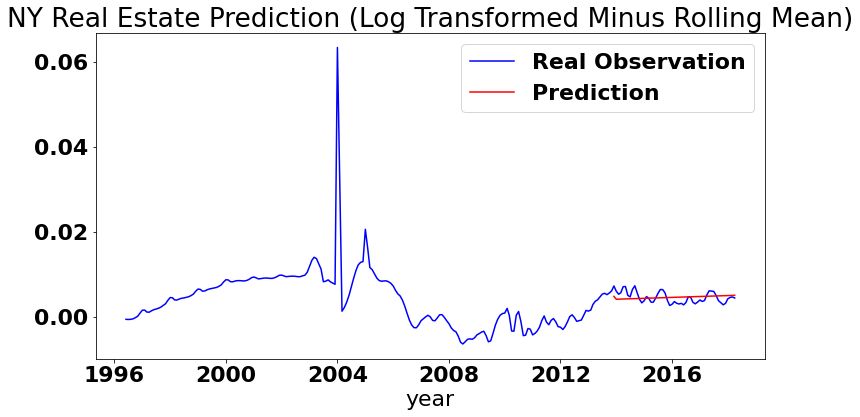

In [109]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(NY_data_minus_roll_mean, color='blue')
ax.plot(datetimes[-53:], model_NY_3_fit.forecast(53)[0], color='red')
plt.xlabel('year')
plt.title('NY Real Estate Prediction (Log Transformed Minus Rolling Mean)') 
plt.legend(('Real Observation', 'Prediction')); 

In [110]:
# Roll back rolling mean subtraction
data_NY_for_roll = list(np.log(data_NY_mean.value[:212]))
for i in model_NY_3_fit.forecast(53)[0]:
    data_NY_for_roll.append(i + sum(data_NY_for_roll[-3:])/3)

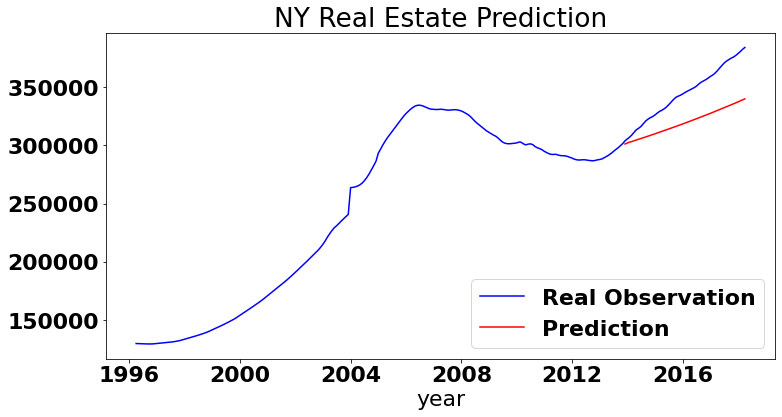

In [111]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_NY_mean, color='blue')
ax.plot(datetimes[-53:], np.exp(data_NY_for_roll)[-53:], color='red')
plt.xlabel('year')
plt.title('NY Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

## Let's calculate how much NY last predicted value was underestimated by in comparison to the real observation.

In [112]:
NY_last_train = data_NY_mean.value[-54]
NY_last_real = data_NY_mean.value[-1]
NY_last_pred = np.exp(data_NY_for_roll)[-1]
print("NY last train observation is ${:,.0f}, last real observation is ${:,.0f}, last prediction is ${:,.0f}".
      format(NY_last_train, NY_last_real, NY_last_pred))

NY_undervalue = (NY_last_real - NY_last_pred)/NY_last_train
print("NY prediction was underestimated by {:.2%}".format(NY_undervalue))

NY last train observation is $301,646, last real observation is $384,161, last prediction is $340,012
NY prediction was underestimated by 14.64%


## Part 3: Time series for TX

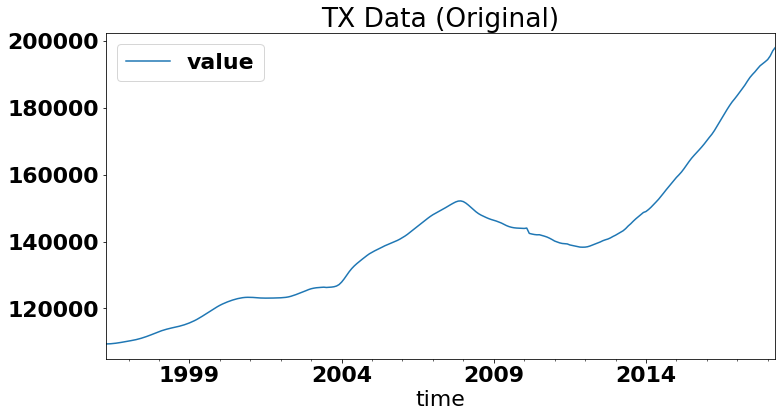

In [113]:
data_TX_mean = melt_data(data[data.State=='TX'])
data_TX_mean.plot(figsize = (12,6))
plt.title('TX Data (Original)');

In [114]:
data_TX_mean

value
time                     
1996-04-01  109384.639831
1996-05-01  109406.885593
1996-06-01  109451.377119
1996-07-01  109521.504237
1996-08-01  109613.983051
...                   ...
2017-12-01  193761.274014
2018-01-01  194417.492417
2018-02-01  195503.134479
2018-03-01  197023.356926
2018-04-01  198029.726997

[265 rows x 1 columns]

### Stationarity check for original TX data

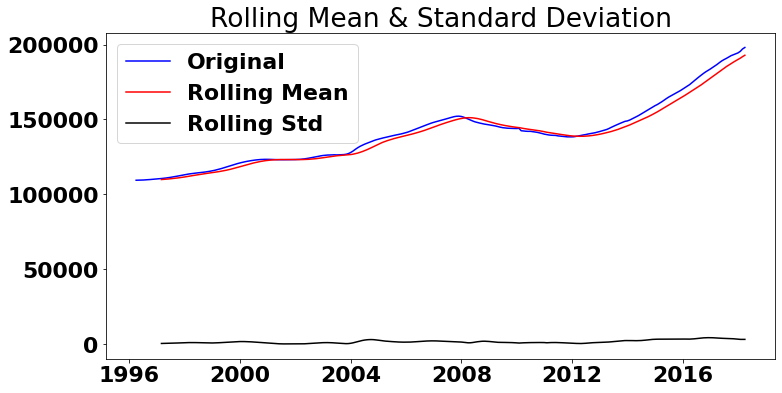

Results of Dickey-Fuller Test: 

Test Statistic                   0.739623
p-value                          0.990596
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [115]:
stationarity_check(data_TX_mean)

#### The time series is not stationary, as the p-value is substantial (0.99 instead of smaller than the typical threshold value 0.05).

### Log transform the time series

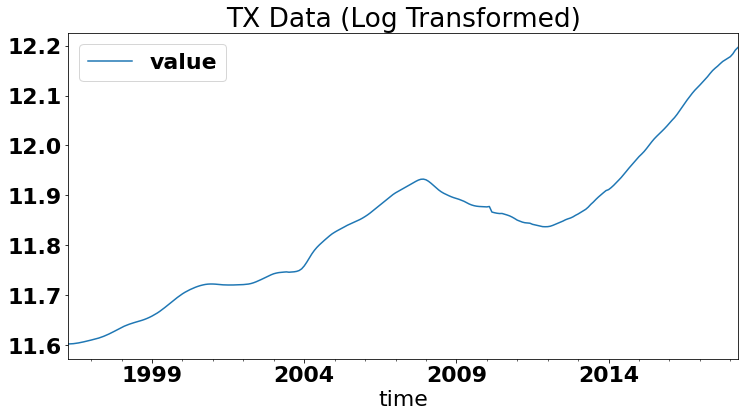

In [116]:
data_TX_mean_log = np.log(data_TX_mean)
data_TX_mean_log.plot(figsize = (12,6))
plt.title('TX Data (Log Transformed)');

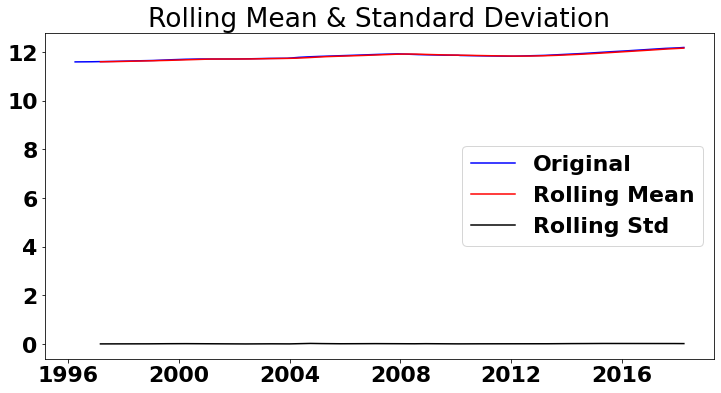

Results of Dickey-Fuller Test: 

Test Statistic                   0.149589
p-value                          0.969288
#Lags Used                       2.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [117]:
stationarity_check(data_TX_mean_log)

#### The time series is not stationary, as the p-value is substantial (0.97 instead of smaller than the typical threshold value 0.05).

### Subtracting the rolling mean

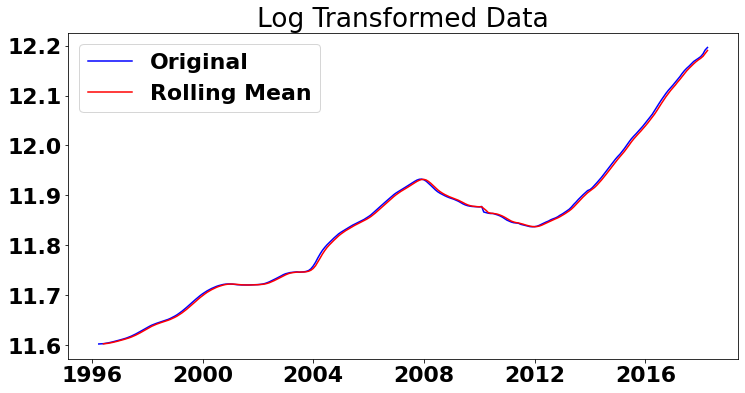

In [118]:
TX_roll_mean = np.log(data_TX_mean).rolling(window=3).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(np.log(data_TX_mean), color='blue', label='Original')
plt.plot(TX_roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False)

In [119]:
# Subtract the moving average from the log transformed data
TX_data_minus_roll_mean = np.log(data_TX_mean) - TX_roll_mean

# Drop the missing values
TX_data_minus_roll_mean.dropna(inplace=True)

# Print the first 10 rows
TX_data_minus_roll_mean.head()

value
time                
1996-06-01  0.000339
1996-07-01  0.000563
1996-08-01  0.000776
1996-09-01  0.000935
1996-10-01  0.001068

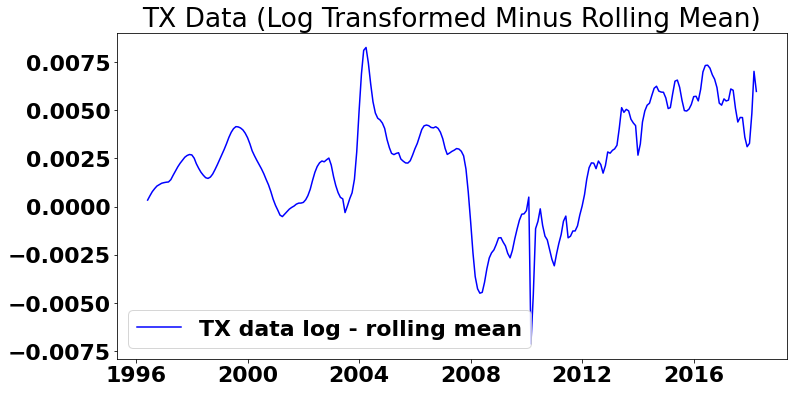

In [120]:
fig = plt.figure(figsize=(12,6))
plt.plot(TX_data_minus_roll_mean, color='blue',label='TX data log - rolling mean')
plt.legend(loc='best')
plt.title('TX Data (Log Transformed Minus Rolling Mean)');

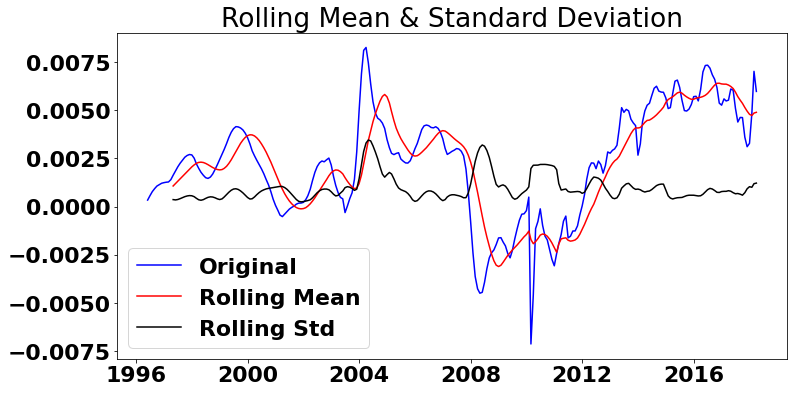

Results of Dickey-Fuller Test: 

Test Statistic                  -2.497492
p-value                          0.116086
#Lags Used                       1.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


In [121]:
stationarity_check(TX_data_minus_roll_mean)

#### The time series is not stationary, as the p-value of 0.11 is higher than the typical threshold value 0.05.

### Differencing

In [122]:
# Difference your data
TX_data_diff = TX_data_minus_roll_mean.diff() 

# Drop the missing values
TX_data_diff.dropna(inplace=True)

# Check out the first few rows
TX_data_diff.head()

value
time                
1996-07-01  0.000224
1996-08-01  0.000214
1996-09-01  0.000159
1996-10-01  0.000133
1996-11-01  0.000073

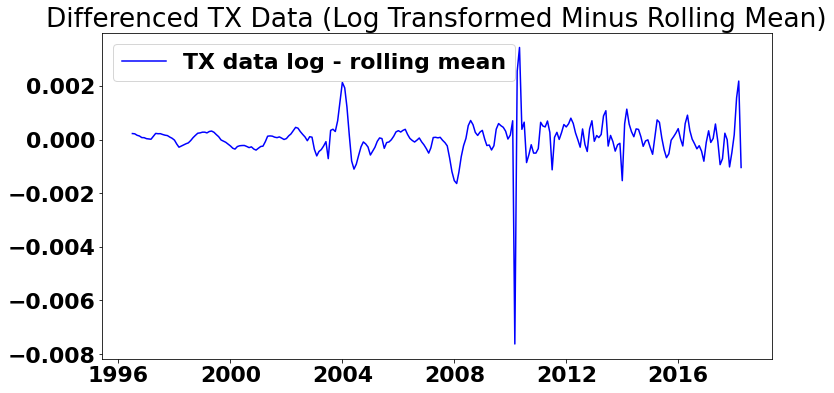

In [123]:
fig = plt.figure(figsize=(12,6))
plt.plot(TX_data_diff, color='blue',label='TX data log - rolling mean')
plt.legend(loc='best')
plt.title('Differenced TX Data (Log Transformed Minus Rolling Mean)');

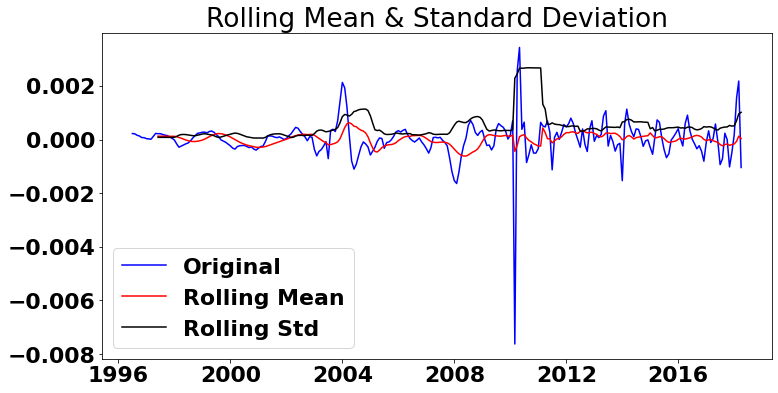

Results of Dickey-Fuller Test: 

Test Statistic                -1.343993e+01
p-value                        3.863148e-25
#Lags Used                     0.000000e+00
Number of Observations Used    2.610000e+02
Critical Value (1%)           -3.455656e+00
Critical Value (5%)           -2.872678e+00
Critical Value (10%)          -2.572705e+00
dtype: float64


In [124]:
stationarity_check(TX_data_diff) 

#### The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! But let's try to difference this data again.

### Differencing (again)

In [125]:
# Difference your data
TX_data_diff_2 = TX_data_diff.diff()

# Drop the missing values
TX_data_diff_2.dropna(inplace=True)

# Check out the first few rows
TX_data_diff_2.head()

value
time                
1996-08-01 -0.000010
1996-09-01 -0.000055
1996-10-01 -0.000026
1996-11-01 -0.000060
1996-12-01 -0.000003

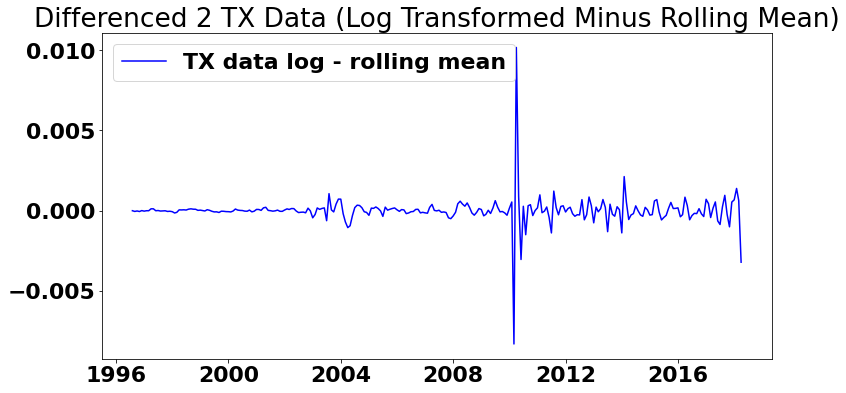

In [126]:
fig = plt.figure(figsize=(12,6))
plt.plot(TX_data_diff_2, color='blue',label='TX data log - rolling mean')
plt.legend(loc='best')
plt.title('Differenced 2 TX Data (Log Transformed Minus Rolling Mean)');

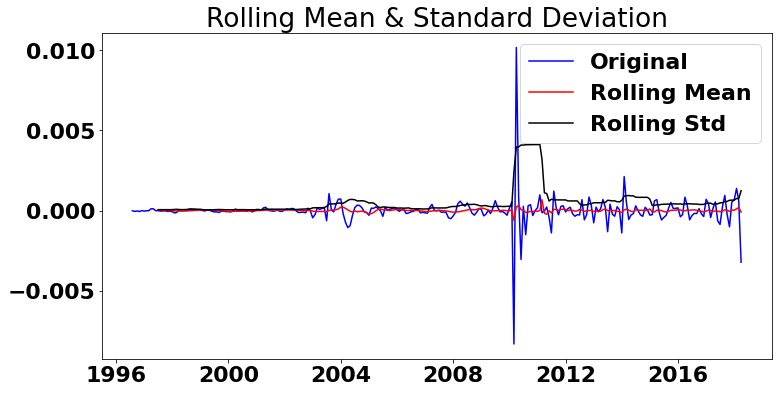

Results of Dickey-Fuller Test: 

Test Statistic                -7.466113e+00
p-value                        5.199331e-11
#Lags Used                     1.400000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


In [127]:
stationarity_check(TX_data_diff_2)

#### The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! Let's try modeling with d=1,2.

### ACF and PACF for CA data log - rolling mean differenced once

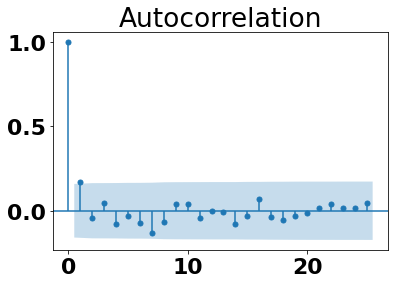

In [128]:
plot_acf(TX_data_diff['value'], alpha=.01);

#### Based on ACF graph above, we need to include up to q=2 terms in ARIMA

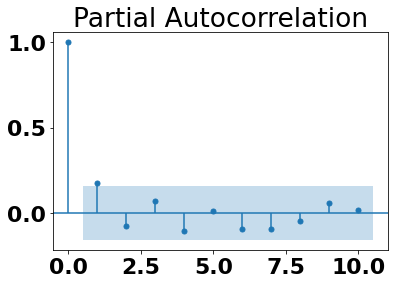

In [129]:
plot_pacf(TX_data_diff['value'], alpha=.01, lags=10);

#### Based on PACF graph above, we need to include p=2,3 terms in ARIMA

### ACF and PACF for CA data log - rolling mean differenced twice

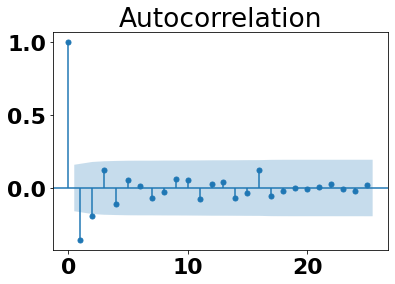

In [130]:
plot_acf(TX_data_diff_2['value'], alpha=.01);

#### Based on ACF graph above, we need to include up to q=3 terms in ARIMA

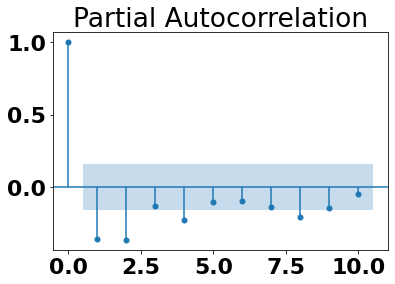

In [131]:
plot_pacf(TX_data_diff_2['value'], alpha=.01, lags=10);

#### Based on PACF graph above, we need to include p=2,3 terms in ARIMA

### Train test split the data

In [132]:
TX_data_minus_roll_mean_train = TX_data_minus_roll_mean[:round(len(TX_data_minus_roll_mean) * 0.8)]
TX_data_minus_roll_mean_test = TX_data_minus_roll_mean[round(len(TX_data_minus_roll_mean) * 0.8):]
TX_data_minus_roll_mean_test.shape

(53, 1)

### ARIMA with order=(1,1,1)

In [133]:
model_TX_1=ARIMA(TX_data_minus_roll_mean_train, order=(1,1,1))
model_TX_1_fit = model_TX_1.fit(disp=0)
print(model_TX_1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1207.854
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 11 Mar 2021   AIC                          -2407.708
Time:                        18:52:00   BIC                          -2394.339
Sample:                    07-01-1996   HQIC                         -2402.303
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.912e-05   5.74e-05      0.333      0.739   -9.33e-05       0.000
ar.L1.D.value    -0.5393      0.182     -2.964      0.003      -0.896      -0.183
ma.L1.D.value     0.7077      0.151     

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

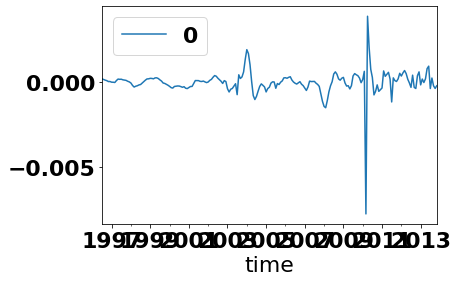

In [134]:
residuals = pd.DataFrame(model_TX_1_fit.resid)
residuals.plot();

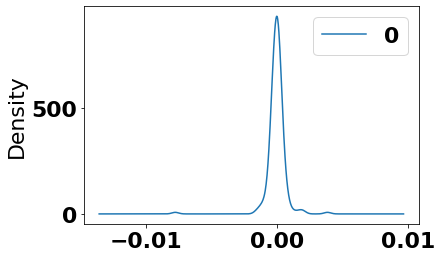

In [135]:
residuals.plot(kind='kde');

In [136]:
model_TX_1_fit.forecast(53)[0]

array([0.00433362, 0.00436778, 0.00437878, 0.00440228, 0.00441904,
       0.00443943, 0.00445786, 0.00447735, 0.00449627, 0.00451549,
       0.00453456, 0.00455371, 0.00457281, 0.00459194, 0.00461105,
       0.00463017, 0.00464929, 0.00466841, 0.00468753, 0.00470665,
       0.00472576, 0.00474488, 0.004764  , 0.00478312, 0.00480224,
       0.00482136, 0.00484048, 0.0048596 , 0.00487872, 0.00489783,
       0.00491695, 0.00493607, 0.00495519, 0.00497431, 0.00499343,
       0.00501255, 0.00503167, 0.00505079, 0.0050699 , 0.00508902,
       0.00510814, 0.00512726, 0.00514638, 0.0051655 , 0.00518462,
       0.00520374, 0.00522286, 0.00524197, 0.00526109, 0.00528021,
       0.00529933, 0.00531845, 0.00533757])

In [137]:
print('AIC:', model_TX_1_fit.aic)
print('RMSE:', np.sqrt(mean_squared_error(TX_data_minus_roll_mean_test, model_TX_1_fit.forecast(53)[0])))

AIC: -2407.7082264722976
RMSE: 0.0012511140039549596


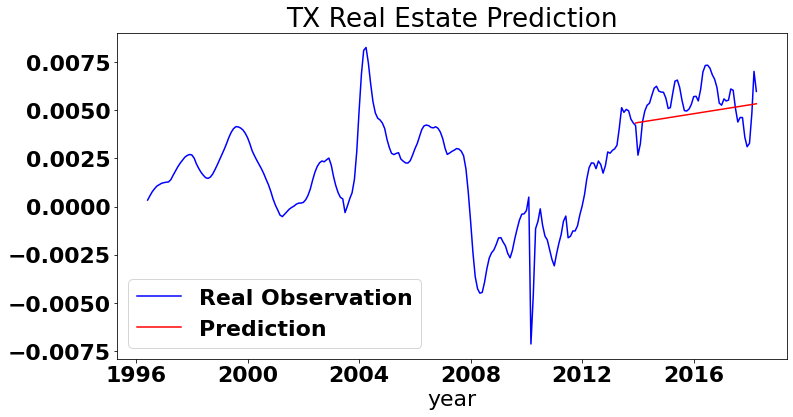

In [138]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(TX_data_minus_roll_mean, color='blue')
ax.plot(datetimes[-53:], model_TX_1_fit.forecast(53)[0], color='red')
plt.xlabel('year')
plt.title('TX Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

### Grid search for hyperparameters with ARIMA

In [139]:
orderlist = []
aiclist = []
rmselist = []
badlist = []
for p in range(0,4):
    for d in range(1,3):
        for q in range(0,4):
            try:
                ordernow = (p,d,q)
                arimax_now = ARIMA(TX_data_minus_roll_mean_train, order=ordernow).fit(disp=0)
                orderlist.append(ordernow)
                aiclist.append(arimax_now.aic)
                rmselist.append(np.sqrt(mean_squared_error(TX_data_minus_roll_mean_test, arimax_now.forecast(53)[0])))
            except:
                badlist.append(ordernow)
                continue

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWar

In [140]:
badlist

[]

In [141]:
df_arima = pd.DataFrame()
df_arima['order'], df_arima['aic'], df_arima['rmse'] = orderlist, aiclist, rmselist

In [142]:
df_arima.sort_values('aic')

order          aic      rmse
9   (1, 1, 1) -2407.708226  0.001251
27  (3, 1, 3) -2407.590464  0.001247
1   (0, 1, 1) -2407.034114  0.001253
8   (1, 1, 0) -2406.533671  0.001261
3   (0, 1, 3) -2406.469049  0.001299
17  (2, 1, 1) -2405.817397  0.001256
10  (1, 1, 2) -2405.788663  0.001254
2   (0, 1, 2) -2405.731382  0.001236
11  (1, 1, 3) -2404.952949  0.001291
25  (3, 1, 1) -2404.943081  0.001294
16  (2, 1, 0) -2404.880163  0.001245
24  (3, 1, 0) -2404.770596  0.001289
18  (2, 1, 2) -2404.046633  0.001270
0   (0, 1, 0) -2403.602350  0.001242
19  (2, 1, 3) -2403.213205  0.001283
26  (3, 1, 2) -2403.138826  0.001289
6   (0, 2, 2) -2387.494934  0.001305
13  (1, 2, 1) -2387.000987  0.001290
7   (0, 2, 3) -2386.064699  0.001318
21  (2, 2, 1) -2385.289440  0.001310
15  (1, 2, 3) -2384.030813  0.001387
22  (2, 2, 2) -2383.880038  0.001411
5   (0, 2, 1) -2383.398237  0.001563
23  (2, 2, 3) -2377.614315  0.001616
14  (1, 2, 2) -2374.735381  0.002900
30  (3, 2, 2) -2373.292012  0.002624
29  (3, 2, 1) -2371.481087  0.002038
31  (3, 2, 3) -2365.807836  0.001989
28  (3, 2, 0) -2346.809633  0.009119
20  (2, 2, 0) -2345.891910  0.009905
12  (1, 2, 0) -2315.697918  0.010709
4   (0, 2, 0) -2281.541550  0.008386

### ARIMA with order=(1,1,1)
#### This is the best model according to the search above

In [143]:
model_TX_3=ARIMA(TX_data_minus_roll_mean_train, order=(1,1,1))
model_TX_3_fit = model_TX_3.fit(disp=0)
print(model_TX_3_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1207.854
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 11 Mar 2021   AIC                          -2407.708
Time:                        18:52:07   BIC                          -2394.339
Sample:                    07-01-1996   HQIC                         -2402.303
                         - 11-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.912e-05   5.74e-05      0.333      0.739   -9.33e-05       0.000
ar.L1.D.value    -0.5393      0.182     -2.964      0.003      -0.896      -0.183
ma.L1.D.value     0.7077      0.151     

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

<AxesSubplot:xlabel='time'>

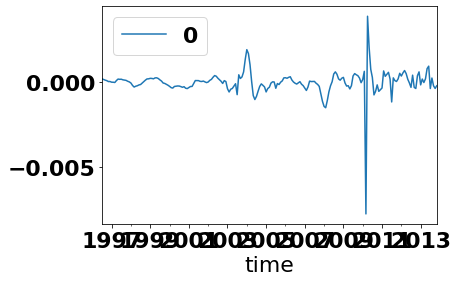

In [144]:
residuals = pd.DataFrame(model_TX_3_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

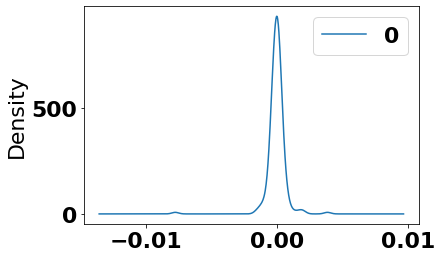

In [145]:
residuals.plot(kind='kde')

In [146]:
model_TX_3_fit.forecast(53)[0]

array([0.00433362, 0.00436778, 0.00437878, 0.00440228, 0.00441904,
       0.00443943, 0.00445786, 0.00447735, 0.00449627, 0.00451549,
       0.00453456, 0.00455371, 0.00457281, 0.00459194, 0.00461105,
       0.00463017, 0.00464929, 0.00466841, 0.00468753, 0.00470665,
       0.00472576, 0.00474488, 0.004764  , 0.00478312, 0.00480224,
       0.00482136, 0.00484048, 0.0048596 , 0.00487872, 0.00489783,
       0.00491695, 0.00493607, 0.00495519, 0.00497431, 0.00499343,
       0.00501255, 0.00503167, 0.00505079, 0.0050699 , 0.00508902,
       0.00510814, 0.00512726, 0.00514638, 0.0051655 , 0.00518462,
       0.00520374, 0.00522286, 0.00524197, 0.00526109, 0.00528021,
       0.00529933, 0.00531845, 0.00533757])

In [147]:
print('AIC:', model_TX_3_fit.aic)
print('RMSE:', np.sqrt(mean_squared_error(TX_data_minus_roll_mean_test, model_TX_3_fit.forecast(53)[0])))

AIC: -2407.7082264722976
RMSE: 0.0012511140039549596


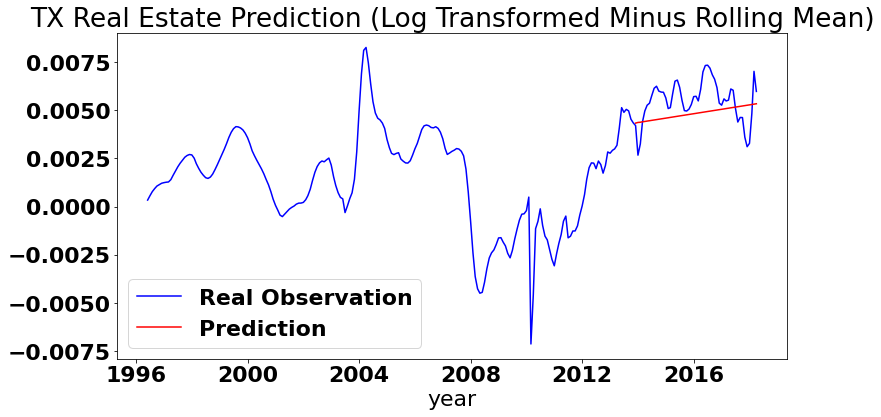

In [148]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(TX_data_minus_roll_mean, color='blue')
ax.plot(datetimes[-53:], model_TX_3_fit.forecast(53)[0], color='red')
plt.xlabel('year')
plt.title('TX Real Estate Prediction (Log Transformed Minus Rolling Mean)') 
plt.legend(('Real Observation', 'Prediction')); 

In [149]:
# Roll back rolling mean subtraction
data_TX_for_roll = list(np.log(data_TX_mean.value[:212]))
for i in model_TX_3_fit.forecast(53)[0]:
    data_TX_for_roll.append(i + sum(data_TX_for_roll[-3:])/3)

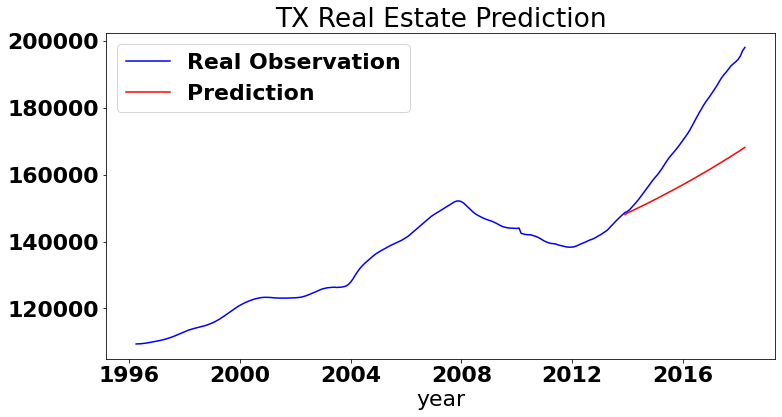

In [150]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_TX_mean, color='blue')
ax.plot(datetimes[-53:], np.exp(data_TX_for_roll)[-53:], color='red')
plt.xlabel('year')
plt.title('TX Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

## Let's calculate how much TX last predicted value was underestimated by in comparison to the real observation.

In [151]:
TX_last_train = data_TX_mean.value[-54]
TX_last_real = data_TX_mean.value[-1]
TX_last_pred = np.exp(data_TX_for_roll)[-1]
print("TX last train observation is ${:,.0f}, last real observation is ${:,.0f}, last prediction is ${:,.0f}".
      format(TX_last_train, TX_last_real, TX_last_pred))

TX_undervalue = (TX_last_real - TX_last_pred)/TX_last_train
print("TX prediction was underestimated by {:.2%}".format(TX_undervalue))

TX last train observation is $148,082, last real observation is $198,030, last prediction is $168,162
TX prediction was underestimated by 20.17%


# Step 6: Final Modeling and Predictions

## Part 1: Final Time series Model for CA

In [152]:
model_CA_final=ARIMA(CA_data_minus_roll_mean, order=(3,1,2))
model_CA_final_fit = model_CA_final.fit(disp=0)

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

In [153]:
model_CA_final_fit_pred = model_CA_final_fit.predict(start='2018-04-01', end='2028-05-01', dynamic=False)

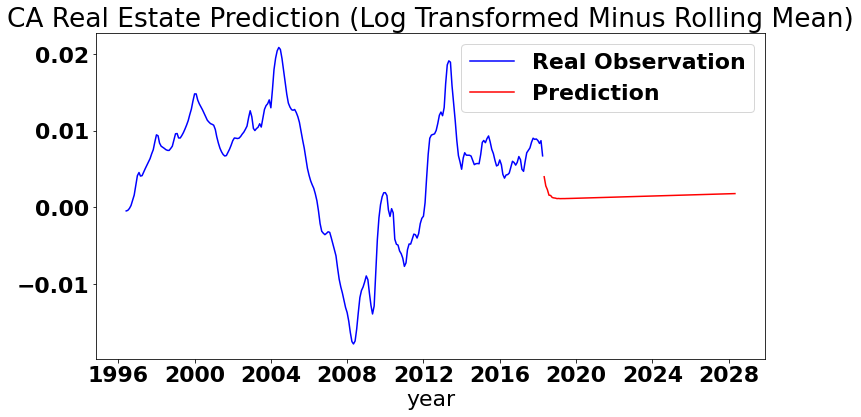

In [154]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(CA_data_minus_roll_mean, color='blue')
ax.plot(model_CA_final_fit_pred.index[1:], model_CA_final_fit.forecast(121)[0], color='red')
plt.xlabel('year')
plt.title('CA Real Estate Prediction (Log Transformed Minus Rolling Mean)') 
plt.legend(('Real Observation', 'Prediction')); 

In [155]:
# Roll back rolling mean subtraction
data_CA_for_roll = list(np.log(data_CA_mean.value))
for i in model_CA_final_fit.forecast(121)[0]:
    data_CA_for_roll.append(i + sum(data_CA_for_roll[-3:])/3)

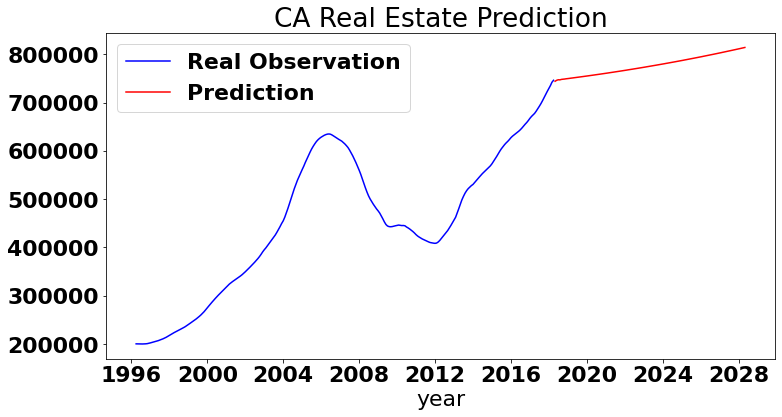

In [156]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_CA_mean, color='blue')
ax.plot(model_CA_final_fit_pred.index[1:], np.exp(data_CA_for_roll)[-121:], color='red')
plt.xlabel('year')
plt.title('CA Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

## Part 2: Final Time series Model for NY

In [157]:
model_NY_final=ARIMA(NY_data_minus_roll_mean, order=(0,1,2))
model_NY_final_fit = model_NY_final.fit(disp=0)

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

In [158]:
model_NY_final_fit_pred = model_NY_final_fit.predict(start='2018-04-01', end='2028-05-01', dynamic=False)

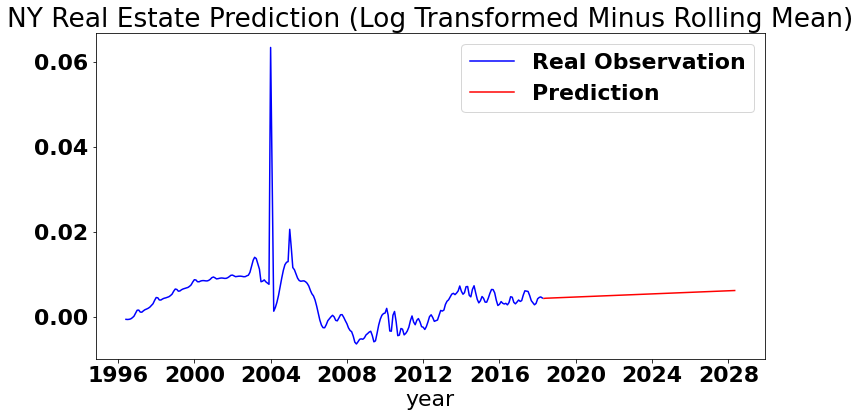

In [159]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(NY_data_minus_roll_mean, color='blue')
ax.plot(model_NY_final_fit_pred.index[1:], model_NY_final_fit.forecast(121)[0], color='red')
plt.xlabel('year')
plt.title('NY Real Estate Prediction (Log Transformed Minus Rolling Mean)') 
plt.legend(('Real Observation', 'Prediction')); 

In [160]:
# Roll back rolling mean subtraction
data_NY_for_roll = list(np.log(data_NY_mean.value))
for i in model_NY_final_fit.forecast(121)[0]:
    data_NY_for_roll.append(i + sum(data_NY_for_roll[-3:])/3)

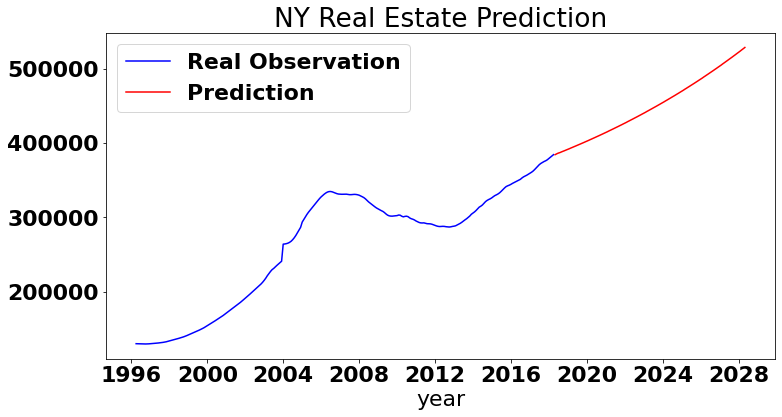

In [161]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_NY_mean, color='blue')
ax.plot(model_NY_final_fit_pred.index[1:], np.exp(data_NY_for_roll)[-121:], color='red')
plt.xlabel('year')
plt.title('NY Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

## Part 3: Final Time series Model for TX

In [162]:
model_TX_final=ARIMA(TX_data_minus_roll_mean, order=(1,1,1))
model_TX_final_fit = model_TX_final.fit(disp=0)

/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/dariga_kokenova/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueW

In [163]:
model_TX_final_fit_pred = model_TX_final_fit.predict(start='2018-04-01', end='2028-05-01', dynamic=False)

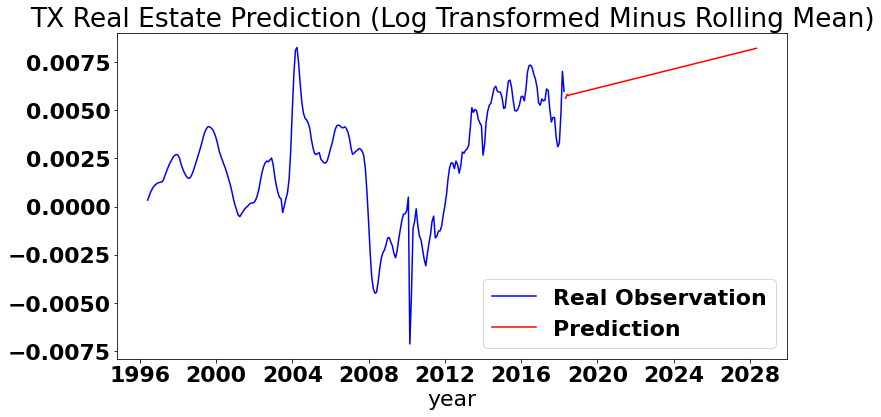

In [164]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(TX_data_minus_roll_mean, color='blue')
ax.plot(model_TX_final_fit_pred.index[1:], model_TX_final_fit.forecast(121)[0], color='red')
plt.xlabel('year')
plt.title('TX Real Estate Prediction (Log Transformed Minus Rolling Mean)') 
plt.legend(('Real Observation', 'Prediction')); 

In [165]:
# Roll back rolling mean subtraction
data_TX_for_roll = list(np.log(data_TX_mean.value))
for i in model_TX_final_fit.forecast(121)[0]:
    data_TX_for_roll.append(i + sum(data_TX_for_roll[-3:])/3)

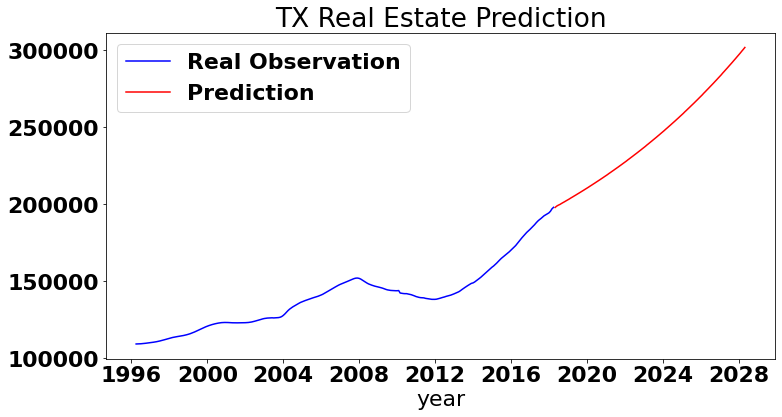

In [166]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data_TX_mean, color='blue')
ax.plot(model_TX_final_fit_pred.index[1:], np.exp(data_TX_for_roll)[-121:], color='red')
plt.xlabel('year')
plt.title('TX Real Estate Prediction') 
plt.legend(('Real Observation', 'Prediction')); 

# Step 7: Interpreting Results

### Evaluate 1, 2, 5, 10 - year return on investment since the last available real observation on 2018/04/01

In [216]:
x_ticks = ['2018/04/01','2019/04/01','2020/04/01','2023/04/01','2028/04/01']

In [217]:
# Last real observation on 2018/04/01 and 1, 2, 5, 10 - year predictions for CA, NY, TX
CA_pred = [data_CA_mean.value[-1], np.exp(data_CA_for_roll)[-110], np.exp(data_CA_for_roll)[-98],
           np.exp(data_CA_for_roll)[-62], np.exp(data_CA_for_roll)[-1]]
NY_pred = [data_NY_mean.value[-1], np.exp(data_NY_for_roll)[-110], np.exp(data_NY_for_roll)[-98],
           np.exp(data_NY_for_roll)[-62], np.exp(data_NY_for_roll)[-1]]
TX_pred = [data_TX_mean.value[-1], np.exp(data_TX_for_roll)[-110], np.exp(data_TX_for_roll)[-98],
           np.exp(data_TX_for_roll)[-62], np.exp(data_TX_for_roll)[-1]]

In [220]:
# % return for 1, 2, 5, 10 - year predictions for CA, NY, TX
CA_pred_percent = ((CA_pred/data_CA_mean.value[-1]) - 1)*100
NY_pred_percent = ((NY_pred/data_NY_mean.value[-1]) - 1)*100
TX_pred_percent = ((TX_pred/data_TX_mean.value[-1]) - 1)*100

In [252]:
import seaborn as sns
sns.set_style('darkgrid')

In [298]:
def add_value_labels_dollars(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for positive and negative values.
            size = 14)
                                        


In [299]:
def add_value_labels_percent(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for positive and negative values.
            size = 14)
                                        


<ipython-input-301-9937690d6a89>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][0].set_yticklabels(['100k', '200k', '400k', '600k', '800k'])
<ipython-input-301-9937690d6a89>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][0].set_xticklabels(x_ticks, rotation=75)
<ipython-input-301-9937690d6a89>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][1].set_xticklabels(x_ticks, rotation=75)
<ipython-input-301-9937690d6a89>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][2].set_xticklabels(x_ticks, rotation=75)


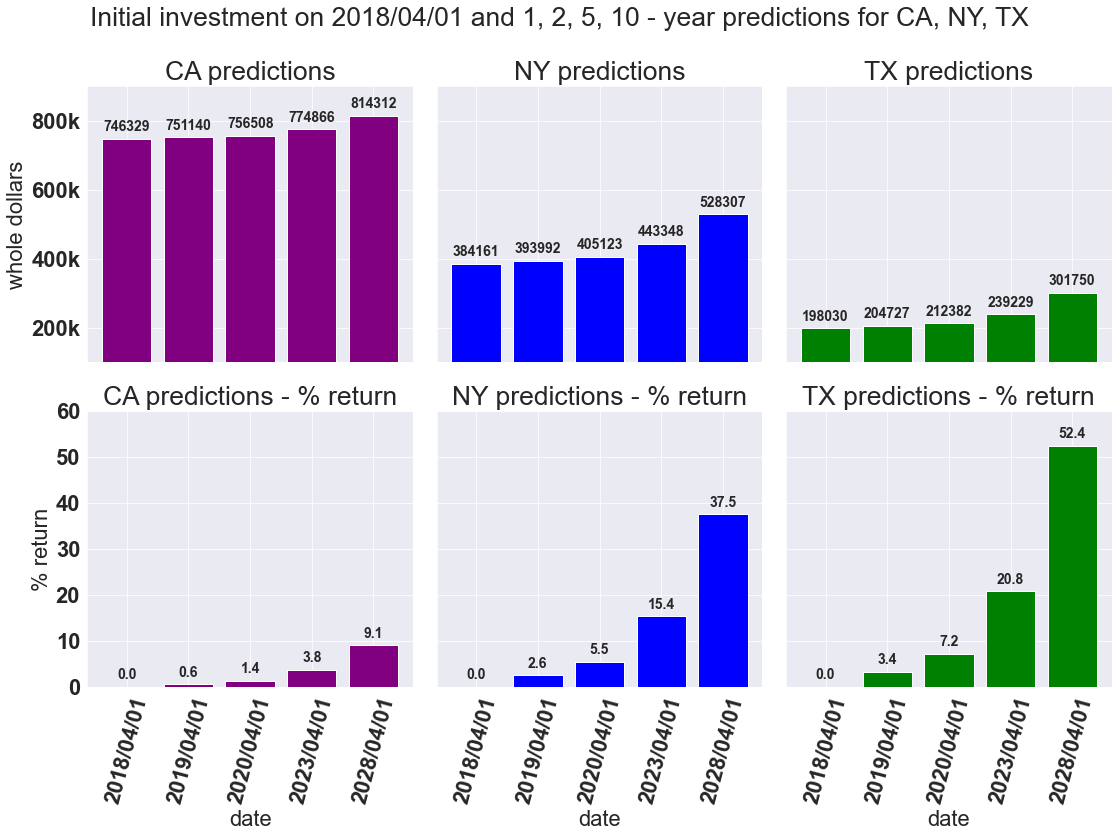

In [301]:
fig, ax = plt.subplots(2,3, figsize=(16,12))
fig.suptitle('Initial investment on 2018/04/01 and 1, 2, 5, 10 - year predictions for CA, NY, TX')

# CA
ax[0][0].bar(x_ticks, CA_pred, color='purple')
ax[0][0].set_title('CA predictions')
ax[0][0].set_xticklabels([])
ax[0][0].set_ylabel('whole dollars')
ax[0][0].set_ylim([100000,900000])
ax[0][0].set_yticklabels(['100k', '200k', '400k', '600k', '800k'])
add_value_labels_dollars(ax[0][0])

ax[1][0].bar(x_ticks, CA_pred_percent, color='purple')
ax[1][0].set_title('CA predictions - % return')
ax[1][0].set_xticklabels(x_ticks, rotation=75)
ax[1][0].set_xlabel('date')
ax[1][0].set_ylim([0,60])
ax[1][0].set_ylabel('% return')
add_value_labels_percent(ax[1][0])

# NY
ax[0][1].bar(x_ticks, NY_pred, color='blue')
ax[0][1].set_title('NY predictions')
ax[0][1].set_xticklabels([])
ax[0][1].set_yticklabels([])
ax[0][1].set_ylim([100000,900000])
add_value_labels_dollars(ax[0][1])

ax[1][1].bar(x_ticks, NY_pred_percent, color='blue')
ax[1][1].set_title('NY predictions - % return')
ax[1][1].set_xticklabels(x_ticks, rotation=75)
ax[1][1].set_xlabel('date')
ax[1][1].set_yticklabels([])
ax[1][1].set_ylim([0,60])
add_value_labels_percent(ax[1][1])

# TX
ax[0][2].bar(x_ticks, TX_pred, color='green')
ax[0][2].set_title('TX predictions')
ax[0][2].set_xticklabels([])
ax[0][2].set_yticklabels([])
ax[0][2].set_ylim([100000,900000])
add_value_labels_dollars(ax[0][2])

ax[1][2].bar(x_ticks, TX_pred_percent, color='green')
ax[1][2].set_title('TX predictions - % return')
ax[1][2].set_xticklabels(x_ticks, rotation=75)
ax[1][2].set_xlabel('date')
ax[1][2].set_yticklabels([])
ax[1][2].set_ylim([0,60])
add_value_labels_percent(ax[1][2])

fig.tight_layout();

## 5-year investment example

In [302]:
print("CA: with initial investment of ${:,.0f}, in 5 years it is predicted to grow up to ${:,.0f} resulting in {:.3}% return on investment".
      format(CA_pred[0], CA_pred[3], CA_pred_percent[3]))
print("NY: with initial investment of ${:,.0f}, in 5 years it is predicted to grow up to ${:,.0f} resulting in {:.4}% return on investment".
      format(NY_pred[0], NY_pred[3], NY_pred_percent[3]))
print("TX: with initial investment of ${:,.0f}, in 5 years it is predicted to grow up to ${:,.0f} resulting in {:.4}% return on investment".
      format(TX_pred[0], TX_pred[3], TX_pred_percent[3]))

CA: with initial investment of $746,329, in 5 years it is predicted to grow up to $774,866 resulting in 3.82% return on investment
NY: with initial investment of $384,161, in 5 years it is predicted to grow up to $443,348 resulting in 15.41% return on investment
TX: with initial investment of $198,030, in 5 years it is predicted to grow up to $239,229 resulting in 20.8% return on investment


In [304]:
print('However, during the analysis on train-test split data, we saw that CA prediction was underestimated by {:.2%}. NY prediction was underestimated by {:.2%} and TX prediction was underestimated by {:.2%}.'
      .format(CA_undervalue, NY_undervalue, TX_undervalue))

However, during the analysis on train-test split data, we saw that CA prediction was underestimated by 28.42%. NY prediction was underestimated by 14.64% and TX prediction was underestimated by 20.17%.


### Between three states (CA, NY, TX): NY and TX have lower barriers of entry and higher return on investments over time. However, during the train-test split analysys, CA prediction was underestimated by 28.42%. Thus, it is possible for CA homes to have higher than predicted returns.

### Overall, I recommend investing in NY and TX homes over CA. Those states have lower home prices and higher expected returns. Although, please keep in mind that these predictions are averages for the whole state and are not expected to accurately predict by individual cities.